#  Прогнозирование снижения покупательской активности

**Цель и задачи**
Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачи**
1. Задача заключается в создании модели, способной прогнозировать вероятность снижения активности клиента в течение следующих трех месяцев.
2. Для исследования необходимо добавить данные о прибыльности клиента из финансового отдела, чтобы определить, какой доход каждый клиент принес компании за последние три месяца.
3. После анализа модельных данных и информации о прибыльности клиентов необходимо выделить сегменты покупателей и разработать для них индивидуальные предложения.

**План проекта**

1. Загрузка данных

    1.1 Загрузить данные.
    
    1.2 Проверить, что данные в таблицах соответствуют описанию.
    
    1.3 Вывод.
    
2. Предобработка данных.

    2.1 Исследование явных дубликатов.
    
    2.2 Изменение типов значений в данных.
    
    2.3 Проверка уникальных значения в столбцах.
    
    2.4 Приведем столбцы к общей стилистике.
    
    2.5 Вывод
    
3. Исследовательский анализ данных
    
    3.1 Исследование категориальных признаков
        
    3.2 Исследование количественных признаков

    3.3 Вывод
    
4. Объединение таблиц

    4.1 Сведение таблиц
    
    4.2 Объедение таблиц
    
    4.3 Вывод
    
5. Корреляционный анализ

    5.1 Вывод
    
6. Использование пайплайнов

    6.1 Резделим данные на тестовый, тренировочные и валидационные выборки
    
    6.2 Создадим списки с названиями признаков
    
    6.3 Создадим пайплайн для подготовки признаков из списка `ohe_columns`
    
    6.4 Создадим пайплайн для подготовки признаков из списка `ord_columns`
    
    6.5 Создадим общий пайплайн для подготовки данных
    
    6.6 Создадим итоговый пайплайн
    
    6.7 Вывод
    
7. Анализ важности признаков

    7.1 Оценим важность признаков с помощью метода SHAP
    
    7.2 Вывод

8. Сегментация покупателей

    8.1 Выполние сегментацию покупателей
    
    8.2 Отобрать группу покупателей и предложить, как увеличить её покупательскую активность
    
    8.3 Вывод

9. Общий вывод

**Описание данных**

В данном проекте 4 датасета: `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv`.

`market_file.csv` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

`market_money.csv` - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка.
- `Выручка` — сумма выручки за период.

`market_time.csv` - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

`money.csv` - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

In [51]:
!pip install phik -q

In [ ]:
!pip install shap -q

In [52]:
#библиотеки

import os

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

import shap

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# для статистического анализа
from scipy import stats as st
from scipy.stats import shapiro

# для работы с графиками
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import phik
from phik.report import plot_correlation_matrix
from phik import report


plt.rcParams['axes.grid'] = True

#кастомизация графиков
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (16,9)})
sns.set_context('notebook', rc={'font.size': 10,
                                'axes.titlesize': 10,
                                'axes.labelsize': 10,
                                'xtick.labelsize': 'small',
                                'ytick.labelsize': 'small',
                                'legend.fontsize': 'small',
                                'legend.title_fontsize': 10})


RANDOM_STATE = 42
TEST_SIZE = 0.25
# отображаем все столбцы
pd.set_option('display.max_columns', None)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Отлично по оформлению
</div>    



In [ ]:
#pip list

In [ ]:
#!pip install matplotlib -U -q

In [ ]:
#!pip install seaborn -U -q

In [ ]:
#!pip install scikit-learn -U -q

## Загрузка данных

### Загрузить данные

Загрузим датасеты `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv`. Обратим внимание, что некоторые в некоторых файлах значения разделены `,`, либо `;`. Также убедимся, что указаные датасеты лежат в нужной директории.

In [2]:
    pth1 = 'market_file.csv'
    pth2 = 'market_money.csv'
    pth3 = 'market_time.csv'
    pth4 = 'money.csv'
    
    
    if (os.path.exists(pth1)) and (os.path.exists(pth2)) and (os.path.exists(pth3)) and (os.path.exists(pth4)):
        market_file = pd.read_csv(pth1, sep= ',')
        market_money = pd.read_csv(pth2, sep= ',')
        market_time = pd.read_csv(pth3, sep= ',')
        money = pd.read_csv(pth4, sep= ';')
    else:
        print('Error Data path')

### Проверить, что данные в таблицах соответствуют описанию.

Напишем функцию для описания данных в таблицах.

In [3]:
def info_df(data):
    display(data.info())
    display(data.describe())
    display(data.head(10))

In [4]:
info_df(market_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   
5  215353                 Снизилась   стандартт                 да   
6  215354                 Снизилась   стандартт                 да   
7  215355                 Снизилась   стандартт                нет   
8  215356                 Снизилась   стандартт                 да   
9  215357                 Снизилась   стандартт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   
6                 5.1                     3           431               0.23   
7                 4.7                     4           284               0.17   
8                 4.2                     4           192               0.14   
9                 3.9                     5           154               0.00   

             Популярная_категория  Средний_просмотр_категорий_за_визит  \
0                Товары для детей                                    6   
1                Товары для детей                                    4   
2               Домашний текстиль                                    5   
3                Товары для детей                                    5   
4                Товары для детей                                    3   
5               Домашний текстиль                                    4   
6           Косметика и аксесуары                                    2   
7                Товары для детей                                    5   
8           Косметика и аксесуары                                    2   
9  Техника для красоты и здоровья                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4  
6                                   3               7                 2  
7                                   1               6                 4  
8                                   2               1                 3  
9                                   3               9                 5

В датасете `market_file`:
- 1300 записей, пропуски отсутствуют;
- Типы значений соотвтсвуют сформированным выборкам;
- Описательная статистика для данного датасета выглядет вполне реалистичной;
- Столбцы `Покупательская активность`, `Тип сервиса`, `Разрешить сообщать	` выбиваются из общей стилистики, ниже приведем их к общему виду;
- Предварительно видим значения в `Тип сервиса` некорректно записаны (пр. `стандартт`), ниже также рассмотрим уникальные значения в каждом столбце.

In [5]:
info_df(market_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4
8  215350     предыдущий_месяц   5457.5
9  215351        текущий_месяц   6610.4

В датасете `market_money`:
- 3900 записей, пропуски отсутствуют;
- типы значений соотвтсвуют сформированным выборкам;
- описательная статистика для данного датасета выглядет вполне реалистичной.

In [6]:
info_df(market_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдцщий_месяц      8
6  215351     текущий_месяц     13
7  215351  предыдцщий_месяц     11
8  215352     текущий_месяц     11
9  215352  предыдцщий_месяц      8

В датасете `market_time`:
- 2600 записей, пропуски отсутствуют;
- Типы значений соотвтсвуют сформированным выборкам;
- Описательная статистика для данного датасета выглядет вполне реалистичной;
- Столбец `минут`,  выбивается из общей стилистики, ниже приведем его к общему виду.

In [7]:
info_df(money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


None

id
count    1300.000000
mean   215997.500000
std       375.421985
min    215348.000000
25%    215672.750000
50%    215997.500000
75%    216322.250000
max    216647.000000

id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21
5  215353    3,95
6  215354    3,62
7  215355    5,26
8  215356    4,93
9  215357    4,66

В датасете `money`:
- 2600 записей, пропуски отсутствуют;
- Тип значений для столбца `Прибыль` нужно поменять с `object` на `float64`.

### Вывод
- датасеты имеют разную длину `market_file` -1300, `market_money` - 3900, `market_time` - 2600 и `money` - 2600;
- описательная статистика во всех датасетах выглядит правдоподобной;
- в датасете `market_file` столбцы `Покупательская активность`, `Тип сервиса`, `Разрешить сообщать	` выбиваются из общей стилистики, ниже приведем их к общему виду;
- в датасете `market_file` предварительно видим значения в `Тип сервиса` некорректно записаны (пр. `стандартт`), ниже также рассмотрим уникальные значения в каждом столбце;
- в датасете `market_time` столбец `минут`,  выбивается из общей стилистики, ниже приведем его к общему виду;
- в датасете `money` тип значений для столбца `Прибыль` нужно поменять с `object` на `float64`.

## Предобработка данных

### Исследование явных дубликатов

Рассмотрим наличие дубликатов в датасетах.

In [8]:
df = {
        'market_file': market_file,
        'market_money': market_money,
        'market_time': market_time,
        'money': money
}

In [9]:
for n, _ in df.items():
    print(f'Дубликаты в {n}', _.duplicated().sum())

Дубликаты в market_file 0
Дубликаты в market_money 0
Дубликаты в market_time 0
Дубликаты в money 0


Явные дубликаты остутствуют в датасетах.

### Изменение типов значений в данных

Выше писали, что в датасете `money` тип значений для столбца `Прибыль` нужно поменять с `object` на `float64`. В данном столбце указана средемесячная прибыль. Записи столбца имеют вид, например, 4,3. Не думаю, что среднемесячная прибыль будет составлять 4,3 руб, следовательно, помимо преобразования типа значений нужно также умножить на 1000.

In [10]:
money['Прибыль'] = (money['Прибыль'].str.replace(',', '.').astype(float)) * 1000

money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


### Проверка уникальных значения в столбцах.

Для проверки уникальных значений напишем следующую фунцию:

In [11]:
def uniq_df(data):
    for n, _ in data.items():
        for i in _.select_dtypes(exclude='number').columns.tolist():
            print(f'В датасете {n} столбец {i} присутствуют следующие уникальные значения')
            print('*' * 100)
            print(_[i].value_counts())

In [12]:
 uniq_df(df)

В датасете market_file столбец Покупательская активность присутствуют следующие уникальные значения
****************************************************************************************************
Покупательская активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64
В датасете market_file столбец Тип сервиса присутствуют следующие уникальные значения
****************************************************************************************************
Тип сервиса
стандарт     914
премиум      376
стандартт     10
Name: count, dtype: int64
В датасете market_file столбец Разрешить сообщать присутствуют следующие уникальные значения
****************************************************************************************************
Разрешить сообщать
да     962
нет    338
Name: count, dtype: int64
В датасете market_file столбец Популярная_категория присутствуют следующие уникальные значения
*********************************************************************

Итак,

для `market_file` в столбце:
- `Тип сервиса` нужно изменить `стандартт` на `стандарт`.
- `Популярная_категория` нужно изменить `Косметика и аксесуары` на `Косметика и аксессуары`.

для `market_time` в столбце:
- `Период присутствуют` нужно изменить `предыдцщий_месяц` на `предыдущий_месяц`.

Устраним опечатки.

In [13]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].str.replace('стандартт', 'стандарт')
market_file['Популярная_категория'] = market_file['Популярная_категория'].str.replace('Косметика и аксесуары', 
                                                                                       'Косметика и аксессуары')
market_time['Период'] = market_time['Период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

### Приведем столбцы к общей стилистике

Выше, определили, что в датасете `market_file` столбцы `Покупательская активность`, `Тип сервиса`, `Разрешить сообщать` выбиваются из общей стилистики. Приведем их к общей стилистике.

In [14]:
market_file.rename(columns = {'Покупательская активность':'Покупательская_активность', 
                              'Тип сервиса':'Тип_сервиса', 
                              'Разрешить сообщать':'Разрешить_сообщать'
                             }, inplace=True)

market_file.columns

Index(['id', 'Покупательская_активность', 'Тип_сервиса', 'Разрешить_сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

### Вывод

- явные дубликаты отсутствуют в датасетах;
- изменили тип значения столбца `Прибыль` в датасете `money` с `odject` на `float`, умножили значения на 1000;
- проверили уникальные значения во всех датасетах, нашли опечатки и устранили их.
- переимновали столбцы в датасете `market_file`, чтобы они выглядили идентично другим названиям столбцов. 

## Исследовательский анализ данных

Перед тем, как приступить к корреляционому анализу и построению модели, нужно понять какие перед нами представлены данные. Для категориальных признаков нужно выяснить, присутствует ли диссбаланс признаков, сколько их в каждой группе. Для количественных - присутствуют ли выбросы в них, насколько данное явление критично для дальнейшей нашей моедли; определить подчиняются ли признаки нормальному распределению; присутствует ли бимодальность в распределениях; нужно ли переводить признак в категориальную шкалу.

Начнем по порядку :)

### Исследование категориальных признаков

Напишем функцию, которая будет строить столбчатые диаграммы для количественных признаков.

In [15]:
def cat_analysis(data, cat, r=1):
      
        # data - исследуемый датасет (обязателен)
        # cat - исследуемый категориальный признак (обязателен)
        # r - режим построения графика. Первично строит полную версию графика при значение 1.  
        #     При иных уберет проценты в столбчатом графике.
        
    data_pivot = (data.pivot_table(index = cat, 
                                  values = 'id', 
                                  aggfunc='count')
    .sort_values(by='id')
    .rename(columns = {'id' : 'count'}))
    
    labels = ((data_pivot['count'] / data_pivot['count'].sum()).round(3) * 100).astype('str') + '%'
    ax = sns.barplot(x=data_pivot.index, y='count', data=data_pivot)
    for container in ax.containers:
        ax.bar_label(container, fontsize=20)
        if r == 1:
            ax.bar_label(container, labels=labels,  padding=-150, fontsize=30, rotation=270, color='#FFFFFF')
    plt.xlabel(f'Наименование групп признака {cat}',fontsize=15)
    plt.ylabel('Количество',fontsize=15)
    plt.title(f'Категориальный признак {cat}', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


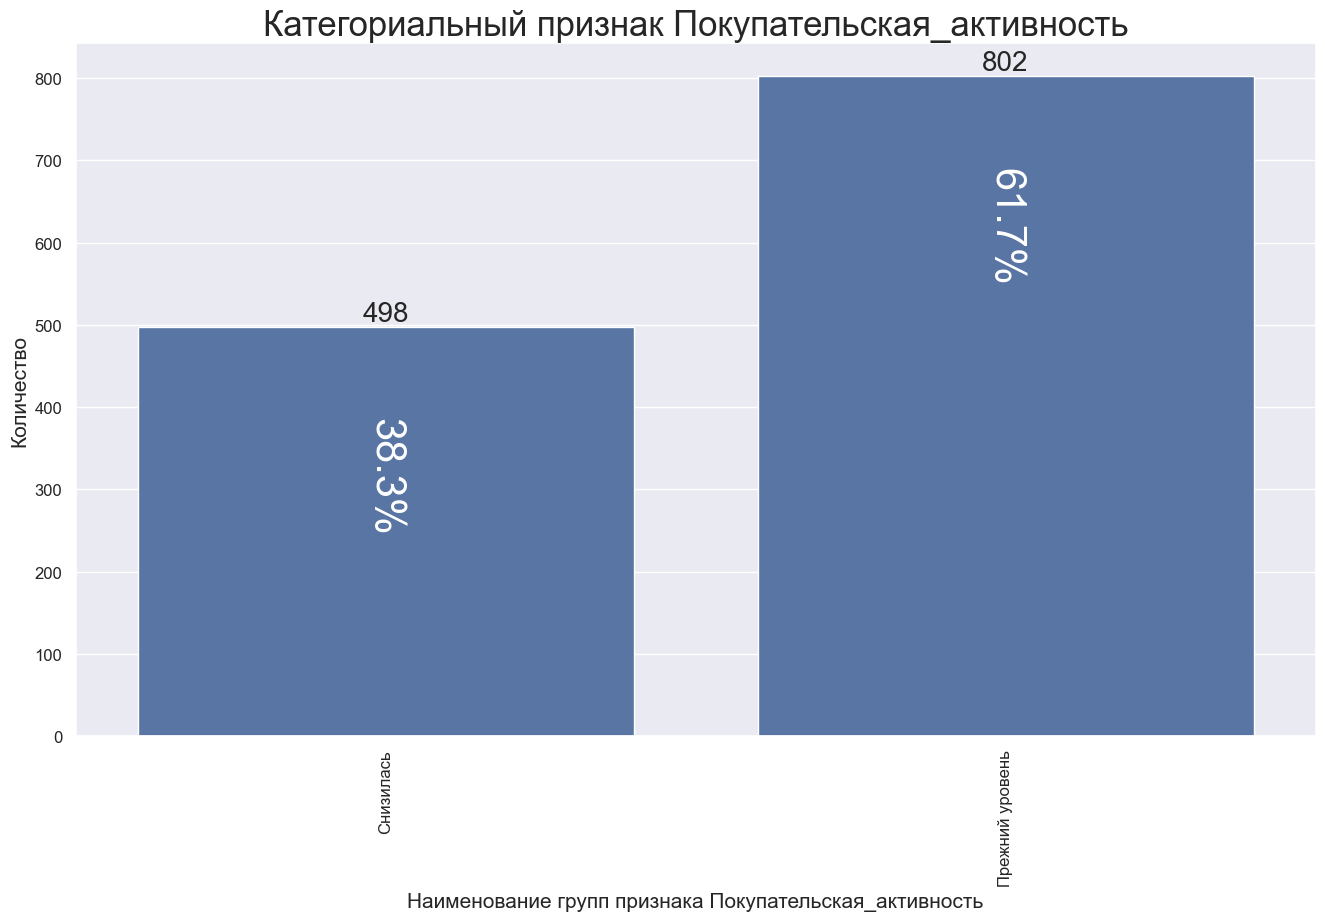

In [16]:
cat_analysis(market_file, cat='Покупательская_активность')

`Покупательская_активность` 61.7% (802 записи) имеют прежний уровень, снижение установлено в 38.3% (498 записи) процентах случаях. Виден дисбаланс у групп, его не получиться устранить, не нарушив закономерности данных.

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


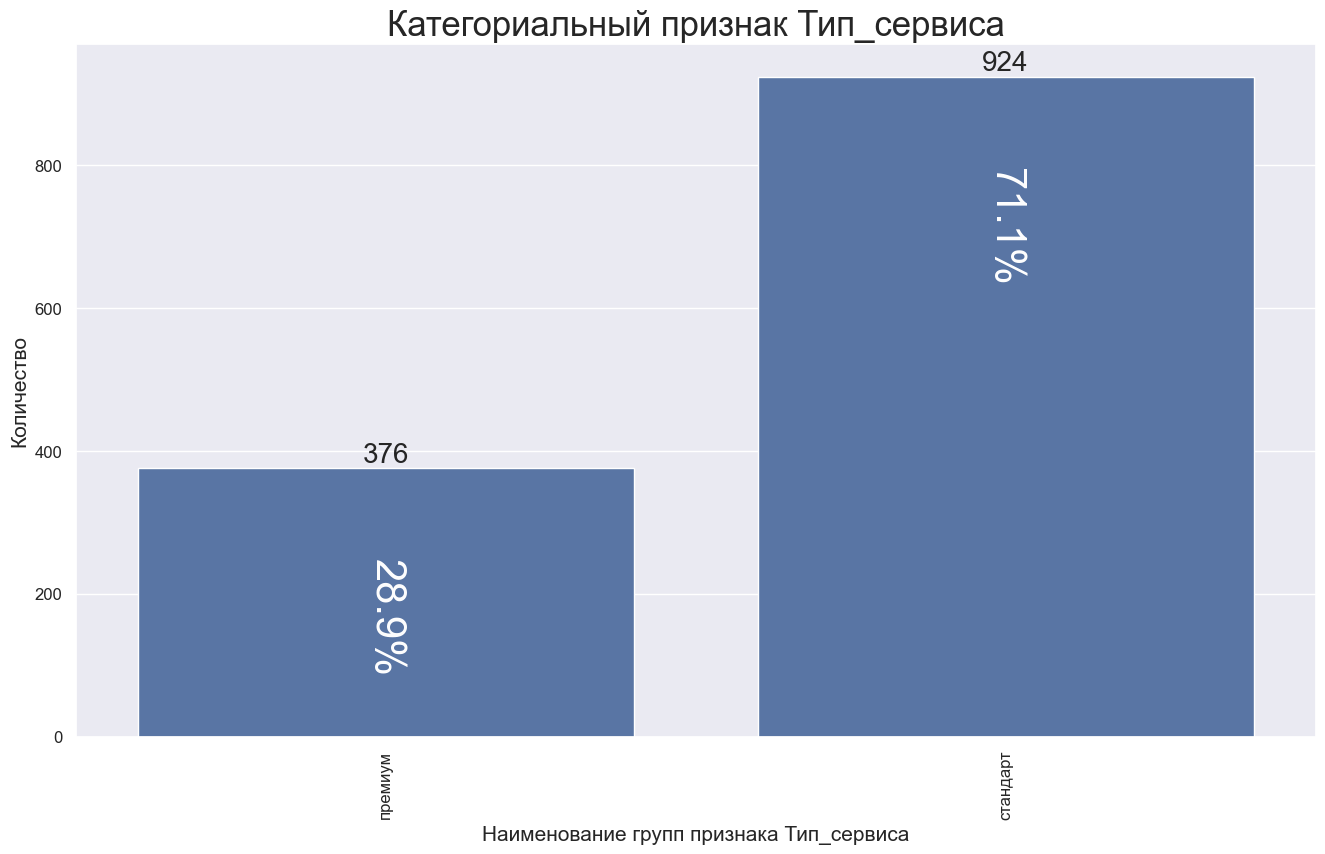

In [17]:
cat_analysis(market_file, cat='Тип_сервиса')

`Тип_сервиса` в основном преобладает стадарт (71.1% с 924 записями). Премиум всего 28.9% (376 записей). 

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


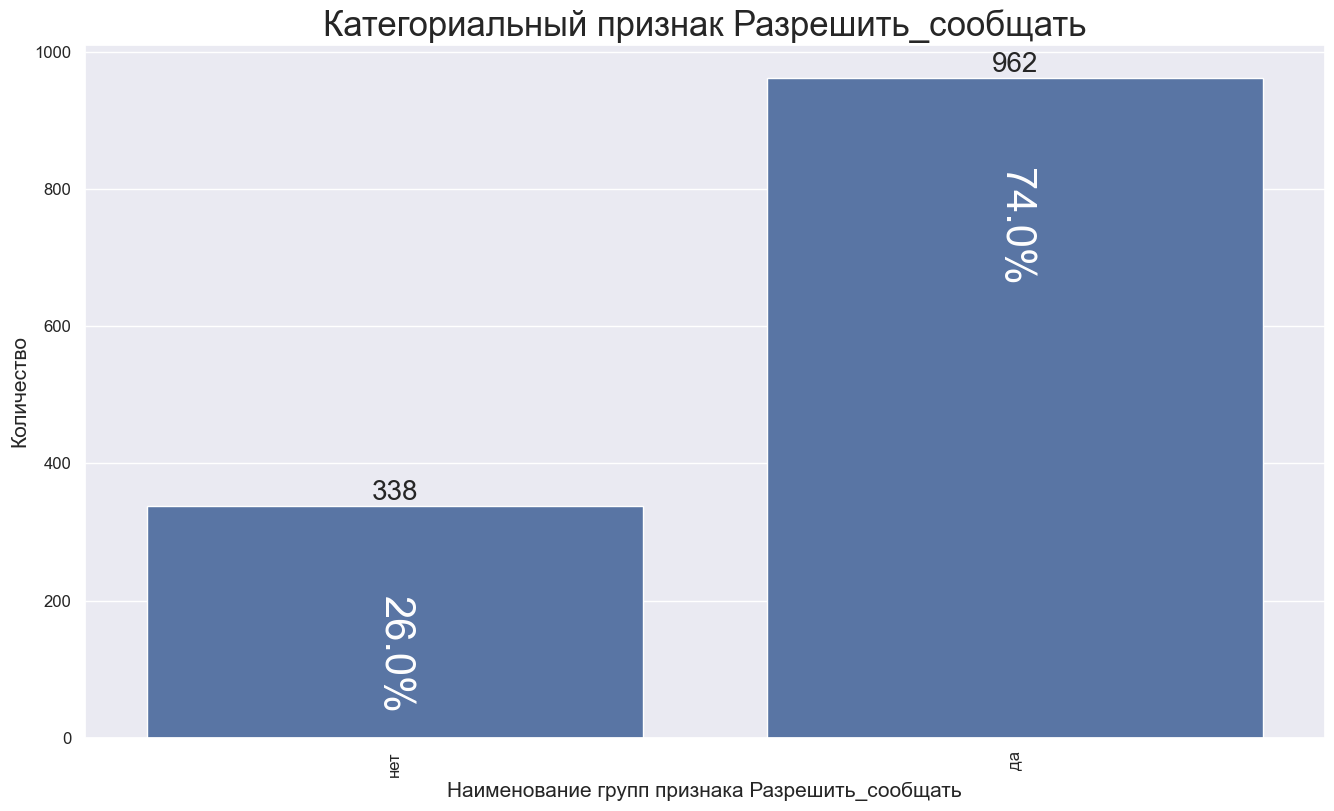

In [18]:
cat_analysis(market_file, cat='Разрешить_сообщать')

`Разрешить_сообщать` - на рассылку подписаны 74% (962 записи), не подписаны 26% (338 записей).

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


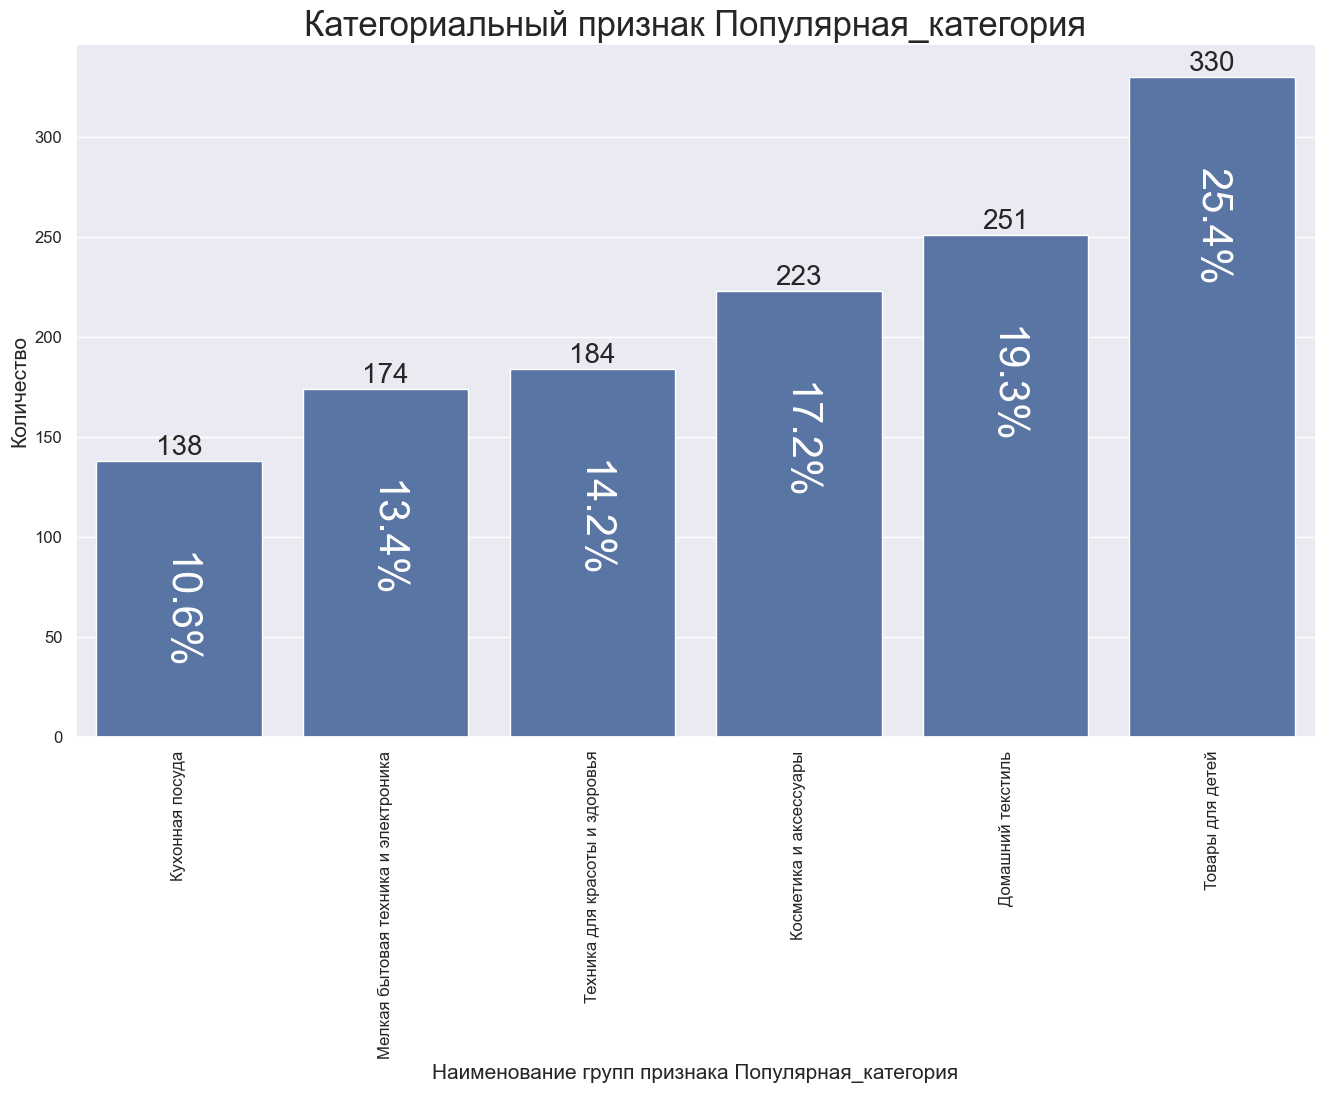

In [19]:
cat_analysis(market_file, cat='Популярная_категория')

`Популярная_категория` - на 1 месте Товары для детей (25.4%, 330 записей), на 2 месте Домашний текстиль (19.3%, 251 запись), на 3 Косметика и аксессуары (17.2%, 223 записи).

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


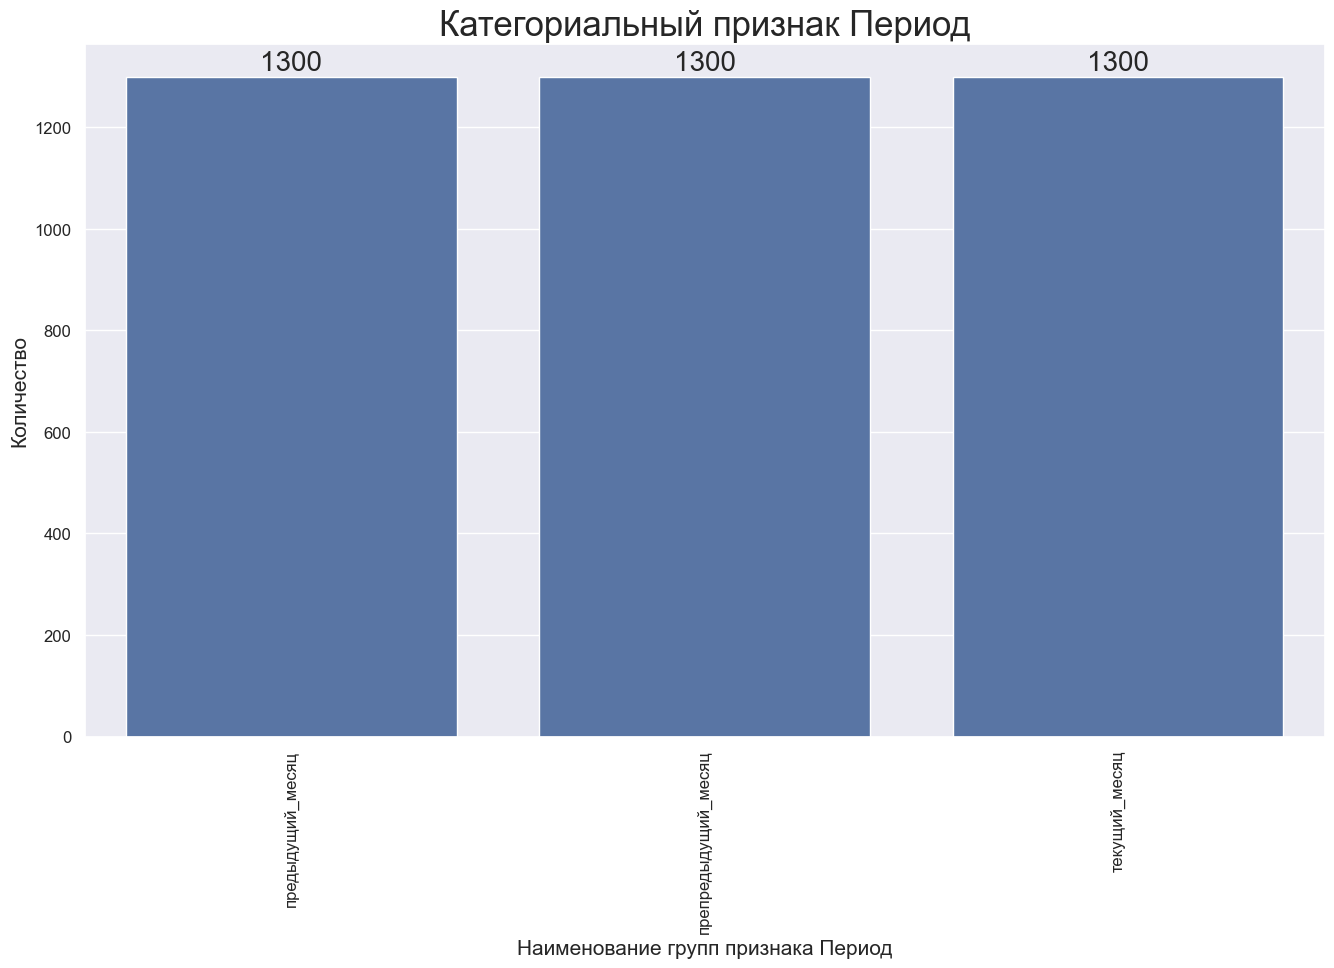

In [20]:
cat_analysis(market_money, cat='Период', r=0)

Периоды равно поделены, в каждом по 1300 значений.

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


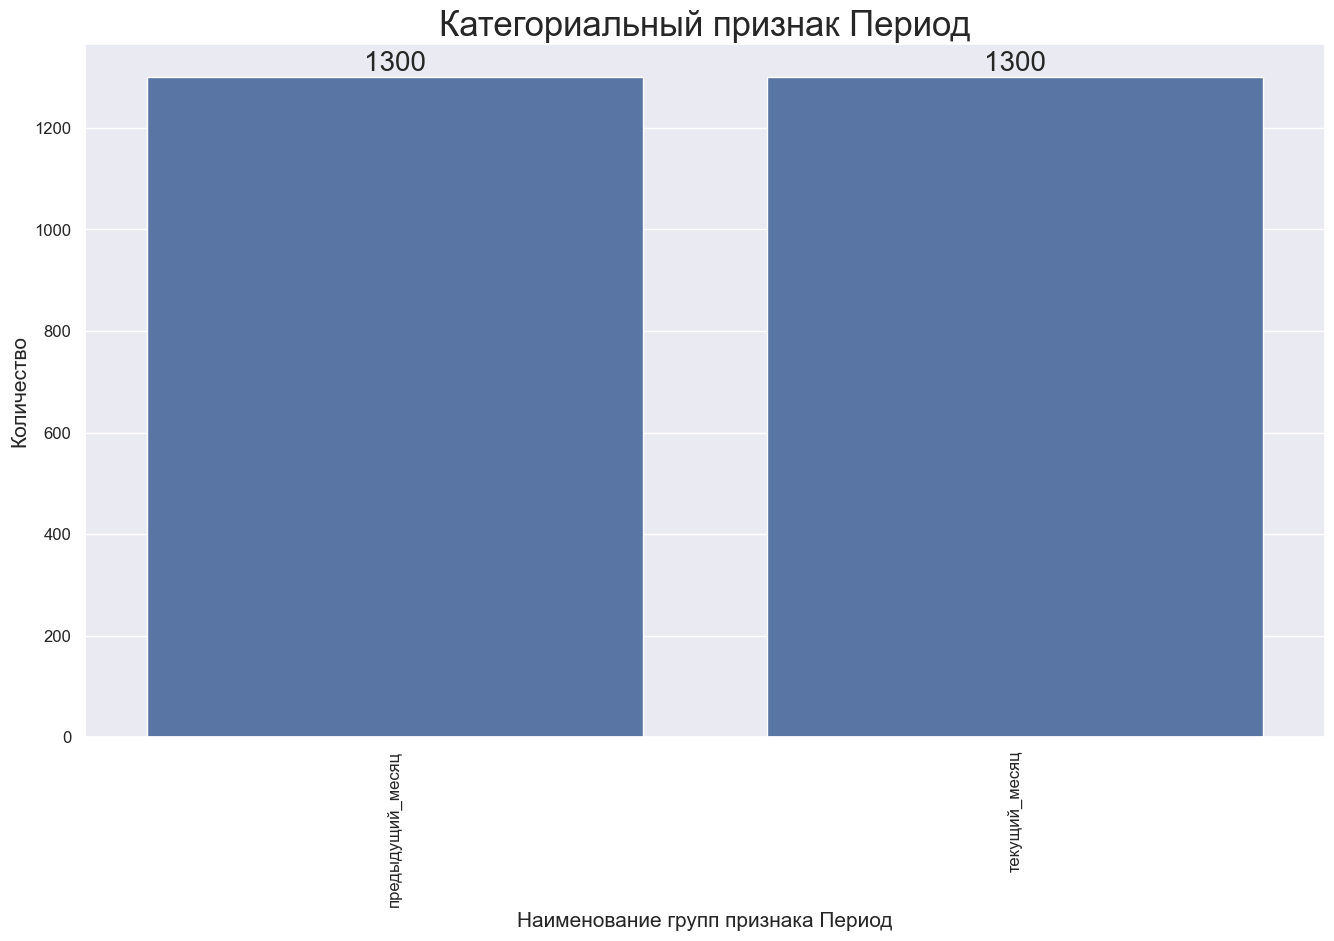

In [21]:
cat_analysis(market_time, cat='Период', r=0)

Периоды равно поделены по 1300 значений.

### Исследование количественных признаков

Рассмотрим колличественные признаки в датасетах. Определим, являеются ли они нормальными с помощью критерия Шапиро-Уилка:

- H0: data['столбец с кол. знач.'] = N(μ, σ^2)
- H1: data['столбец с кол. знач.'] ≠ N(μ, σ^2)

Для кажого признака построим ящик с усами и гистограмму.

In [22]:
# num -столбец с количественными значениями
#data -датасет
def num_analysis(data, num, r=1, bin_num=20):
    
    # num - исследуемый столбец с количественными значениями (обязателен)
    #data - исследуемый датасет
    # bin - число корзин
    # r - режим построения графика.   
    #     1 - строит ящик с усами и гистограмму признака
    #     2 - построение гистограмм  с разделением покупательской активности.
    
    if r == 1:
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
        sns.boxplot(x=data[num], ax=ax_box).set_title(f'Распределение {num}', fontsize=25);
        sns.histplot(data=data, x=num, ax=ax_hist, bins=bin_num);
    
        ax_box.set(xlabel='');
        plt.xlabel(f'Число {num}', fontsize=15);
        plt.ylabel('Частота', fontsize=15);
    
        plt.axvline(x=data[num].mean(), color='g', linestyle='-', label=f'mean: {data[num].mean()}');
        plt.axvline(x=data[num].median(), color='g', linestyle='--', label=f'median: {data[num].median()}');
        plt.legend();
    
        display(data[num].describe())
        print(shapiro(data[num]))
        
    elif r == 2:
        low = market_file[market_file['Покупательская_активность'] == 'Снизилась']
        norm = market_file[market_file['Покупательская_активность'] == 'Прежний уровень']

        sns.histplot(data=norm, x=norm[num], bins=bin_num, alpha= 0.7, label='Прежний уровень', color='red');
        plt.axvline(x=norm[num].mean(), color='r', linestyle='-', label=f'mean: {norm[num].mean()}');
        plt.axvline(x=norm[num].median(), color='r', linestyle='--', label=f'median: {norm[num].median()}');
        print(shapiro(norm[num]))
        
        sns.histplot(data=low, x=low[num], bins=bin_num, label='Снизилась');
        plt.axvline(x=low[num].mean(), color='b', linestyle='-', label=f'mean: {low[num].mean()}');
        plt.axvline(x=low[num].median(), color='b', linestyle='--', label=f'median: {low[num].median()}');
        print(shapiro(low[num]))        
        
        plt.xlabel(f'Число {num}', fontsize=15);
        plt.ylabel('Частота', fontsize=15);
        plt.title(f'Распределение {num}', fontsize=25)
        
        plt.legend(loc='upper right');

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64

ShapiroResult(statistic=0.9779597520828247, pvalue=3.3620735319025985e-13)


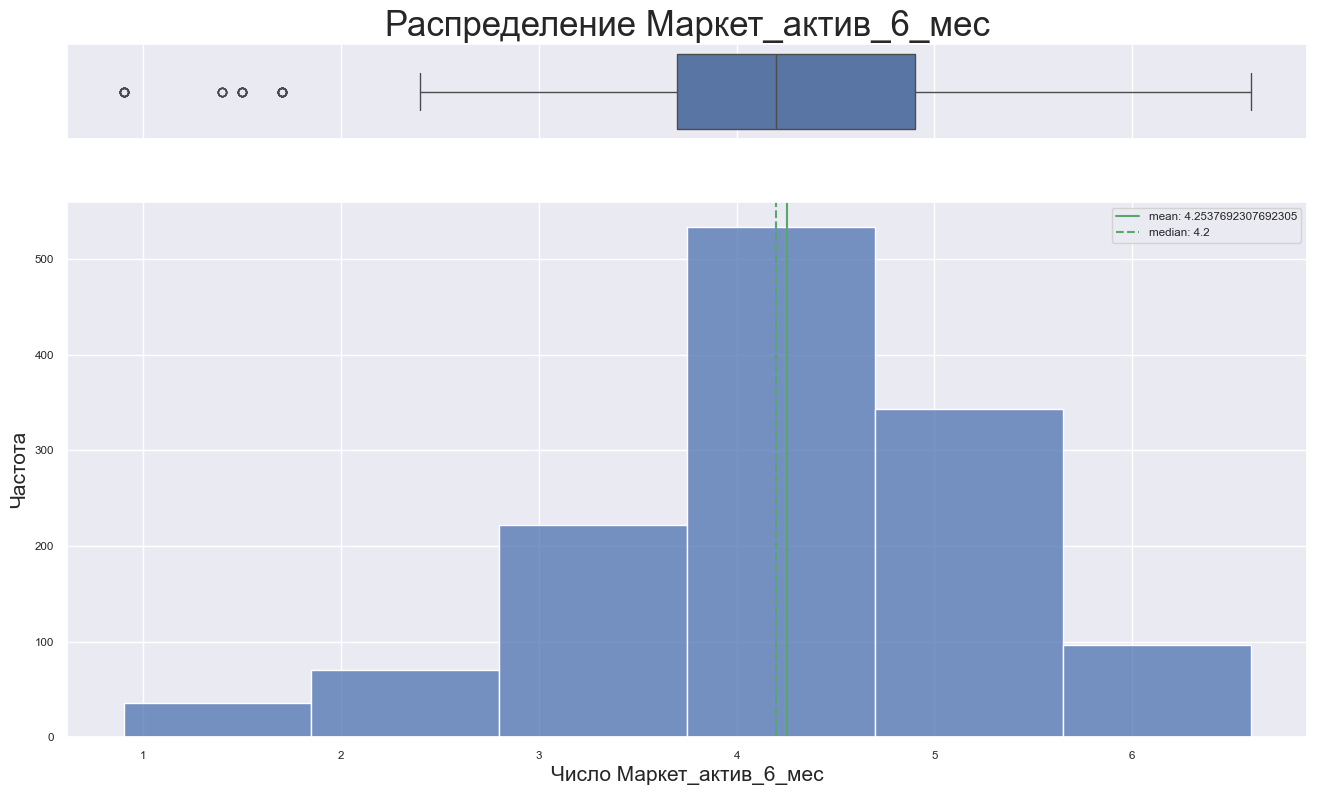

In [23]:
num_analysis(data=market_file, num='Маркет_актив_6_мес', bin_num=6)

Присутствуют выбросы в распределение `Маркет_актив_6_мес`. Будем считать их допустимыми, т.к. данные отрожают среднемесячную маркетинговую активность за 6 месяцев.
Разобьем маркетинговые коммуникации на 2 группы: те, которые снизились за 6 месяев, и те, которые остались на прежнем уровне.

ShapiroResult(statistic=0.9850547313690186, pvalue=2.6872106673181406e-07)
ShapiroResult(statistic=0.9748258590698242, pvalue=1.481256362012573e-07)


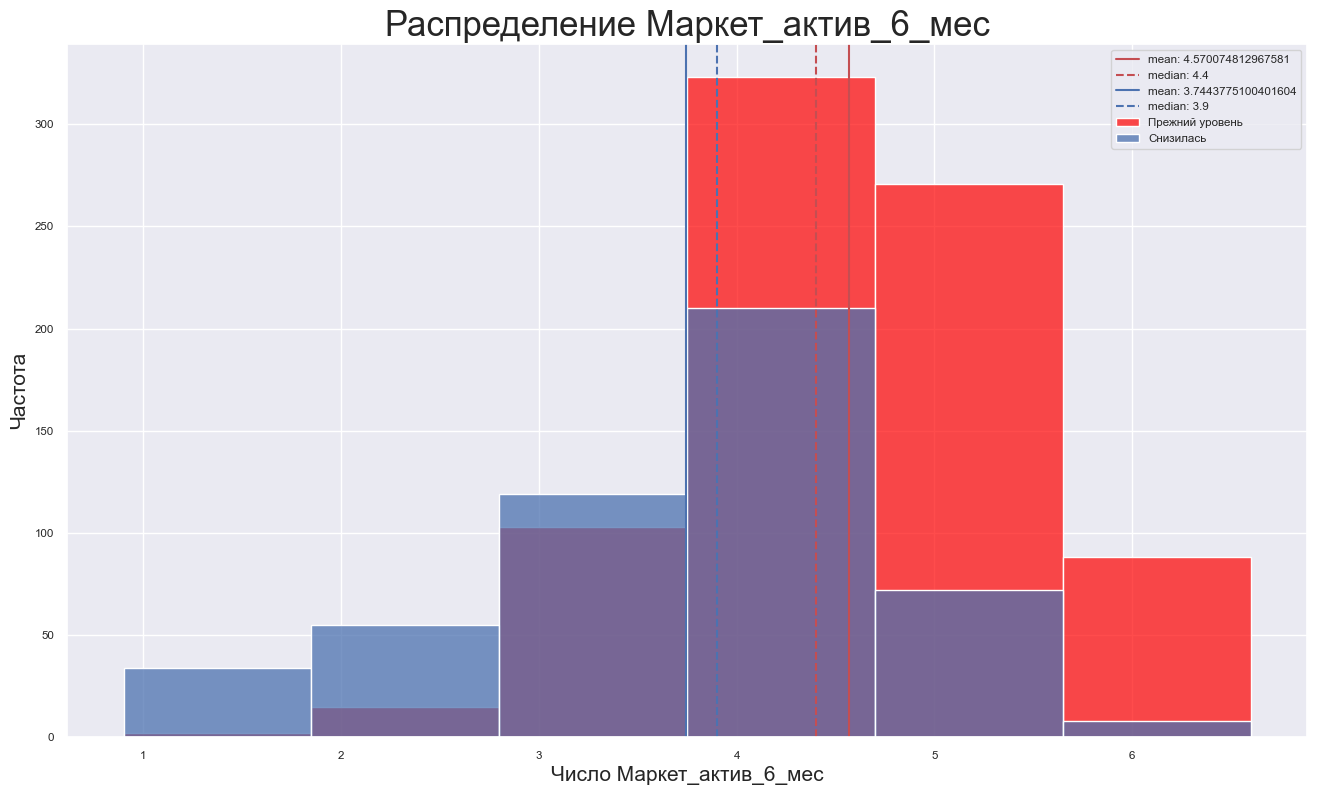

In [24]:
num_analysis(data=market_file, num='Маркет_актив_6_мес', r=2, bin_num=6)

В среднем приходится 4 маркетинговые коммуникации за последние 6 месяцев. Распределение в `Маркет_актив_6_мес` не распределено нормально, т.к. p-value < 0.5.

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64

ShapiroResult(statistic=0.8060010671615601, pvalue=7.404956584629319e-37)


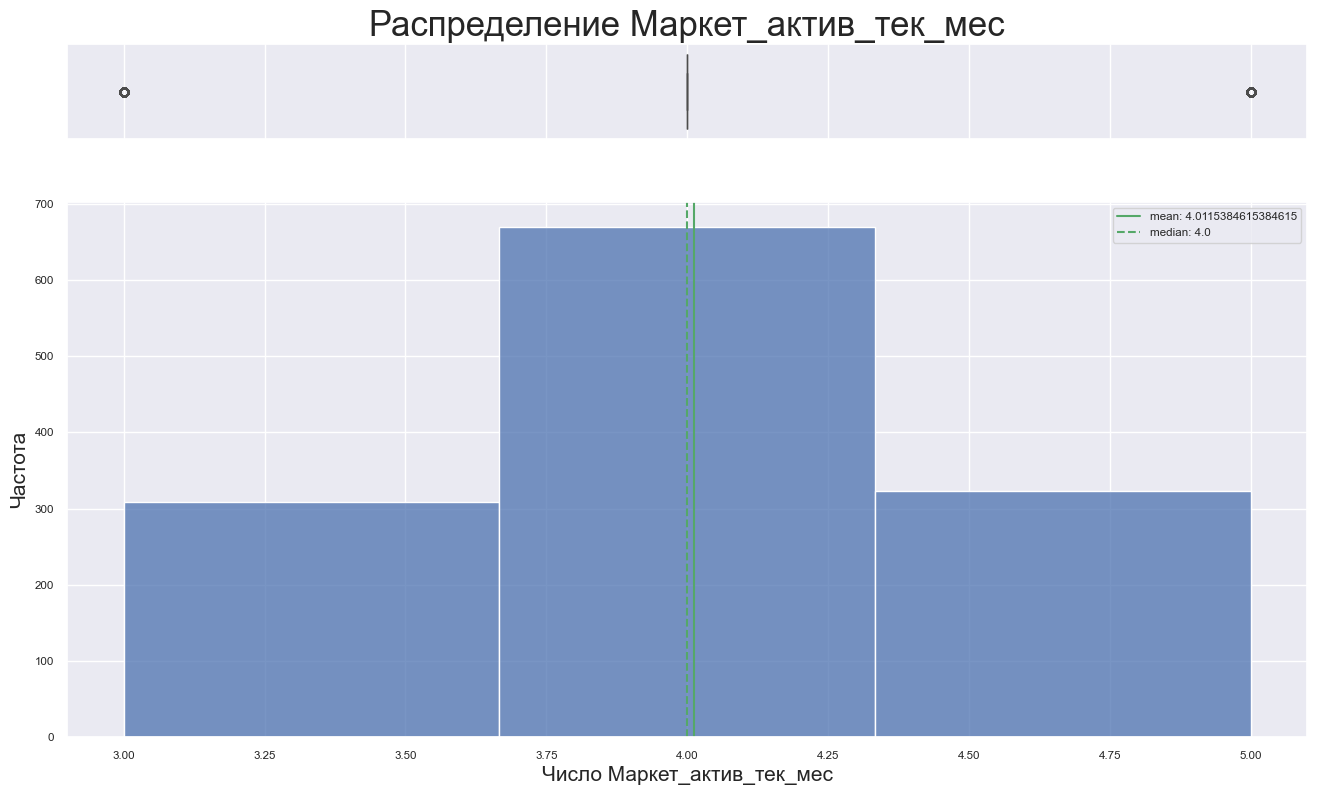

In [25]:
num_analysis(data=market_file, num='Маркет_актив_тек_мес', bin_num=3)

В среднем проводиться 4 акции в месяц - 669 (51.5%).

ShapiroResult(statistic=0.8043734431266785, pvalue=5.030570392140609e-30)
ShapiroResult(statistic=0.8077908754348755, pvalue=6.791739773128278e-24)


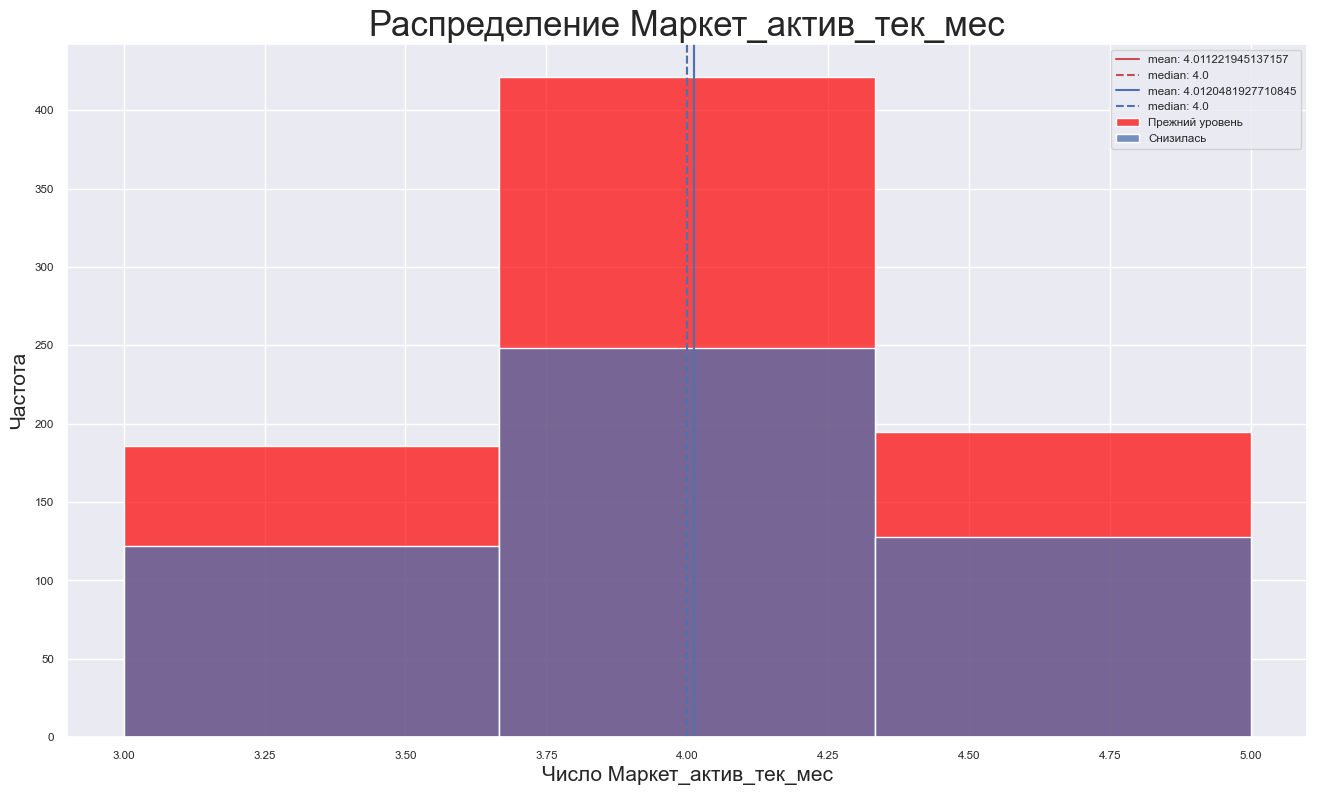

In [26]:
num_analysis(data=market_file, num='Маркет_актив_тек_мес', bin_num=3, r=2)

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64

ShapiroResult(statistic=0.9726996421813965, pvalue=5.791480627183451e-15)


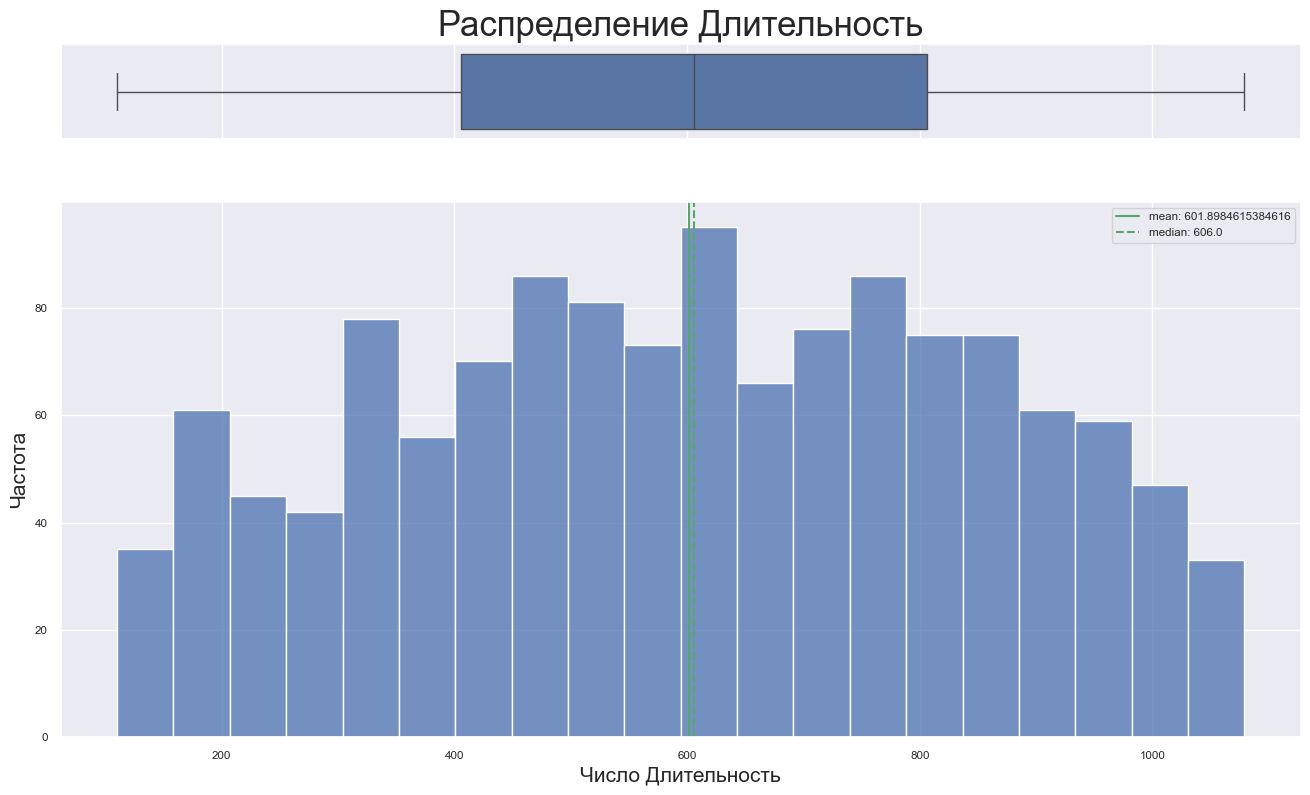

In [27]:
num_analysis(data=market_file, num='Длительность')

Признак длительность не распределено нормально (p-value < 0.5). В среднем, люди зарегистрированы 602 дня. Минимально 110, максимально 1079 дней.

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64

ShapiroResult(statistic=0.6621266603469849, pvalue=5.605193857299268e-45)


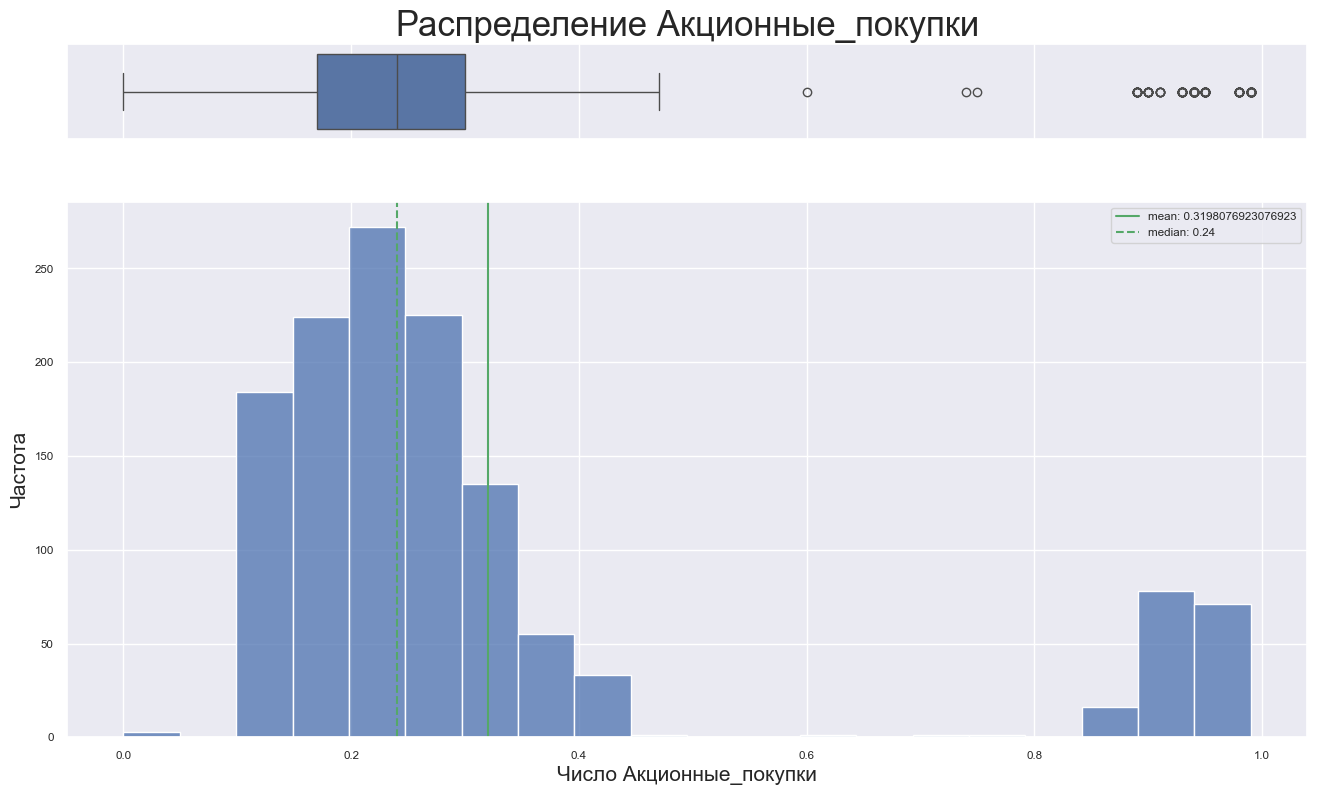

In [28]:
num_analysis(data=market_file, num='Акционные_покупки')

Из гистограммы видно, что признак `Акционные_покупки` нужно перевести в категориальную шкалу.

In [29]:
def sale(s):
    if s < 0.6:
        return 'минимальная'
    return 'максимальная'

In [30]:
market_file['Доля_акций_от_покупок_06'] = market_file['Акционные_покупки'].apply(sale)

Посмотрим, как распределено новое категориальное значение.

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


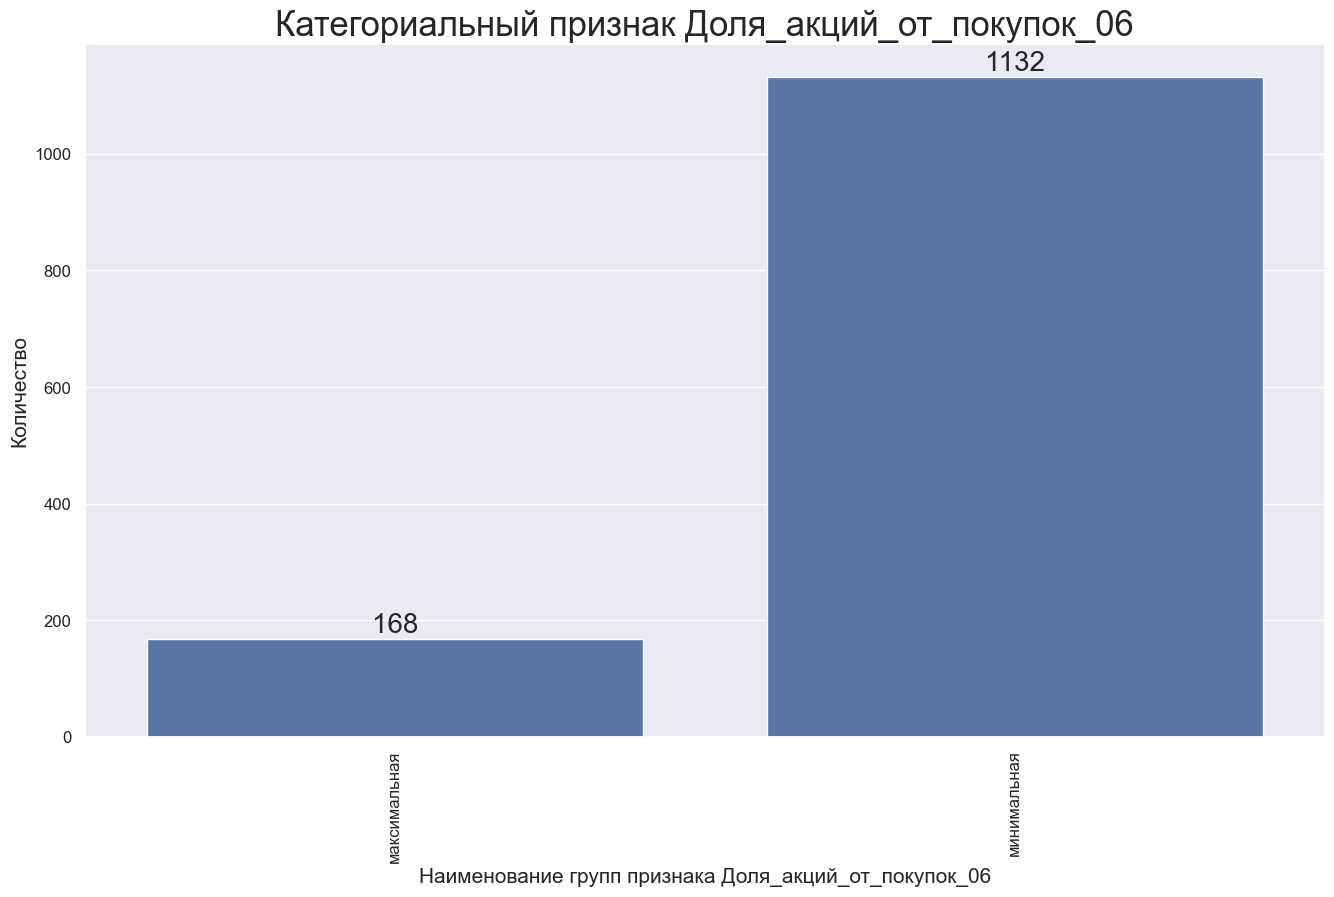

In [31]:
cat_analysis(market_file, cat='Доля_акций_от_покупок_06', r=0)

Видим, что в основном преобладают покупки не по акции.

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64

ShapiroResult(statistic=0.9306076169013977, pvalue=4.3604815072897926e-24)


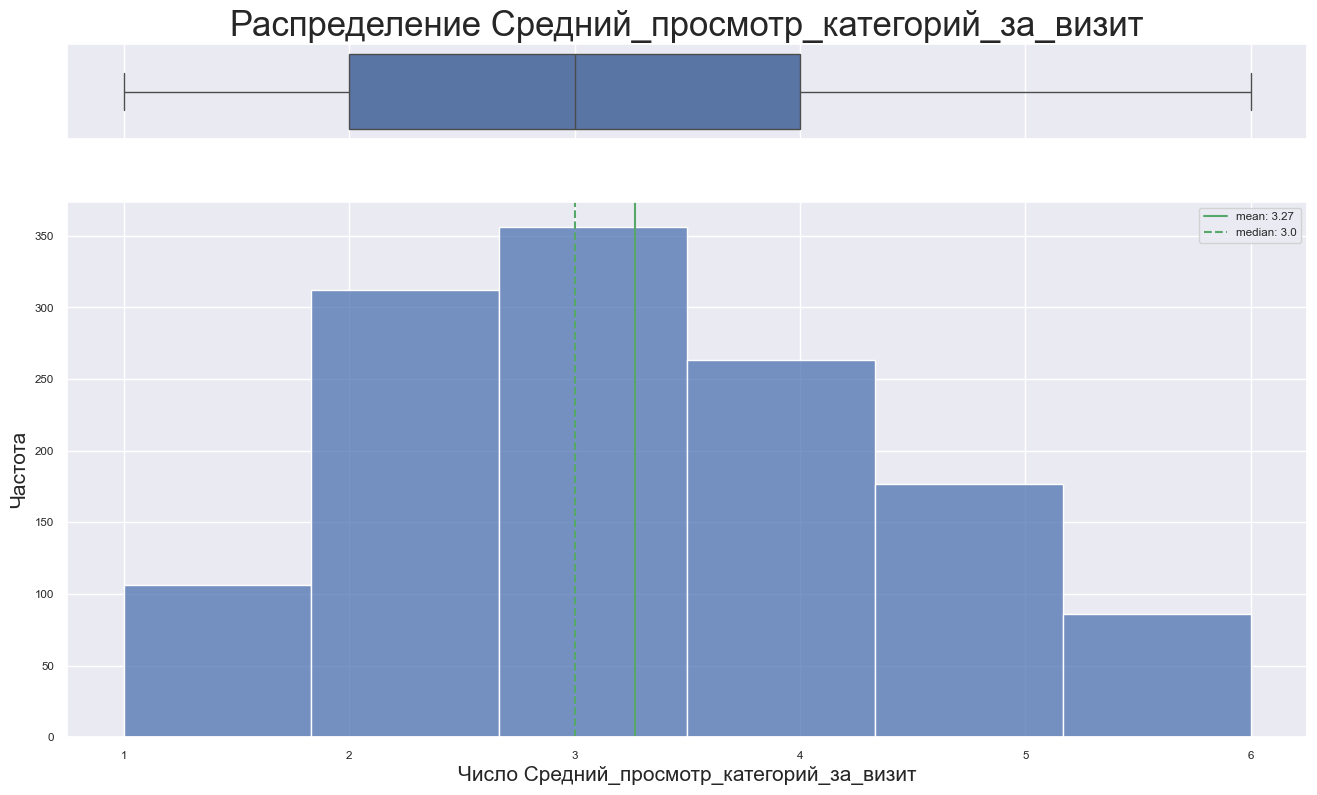

In [32]:
#cat_analysis(market_file, cat='Средний_просмотр_категорий_за_визит', r=0)
num_analysis(data=market_file, num='Средний_просмотр_категорий_за_визит', bin_num=6)

В среднем посетитили просматриваю 3 категории.

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

ShapiroResult(statistic=0.9328905940055847, pvalue=1.016619879143336e-23)


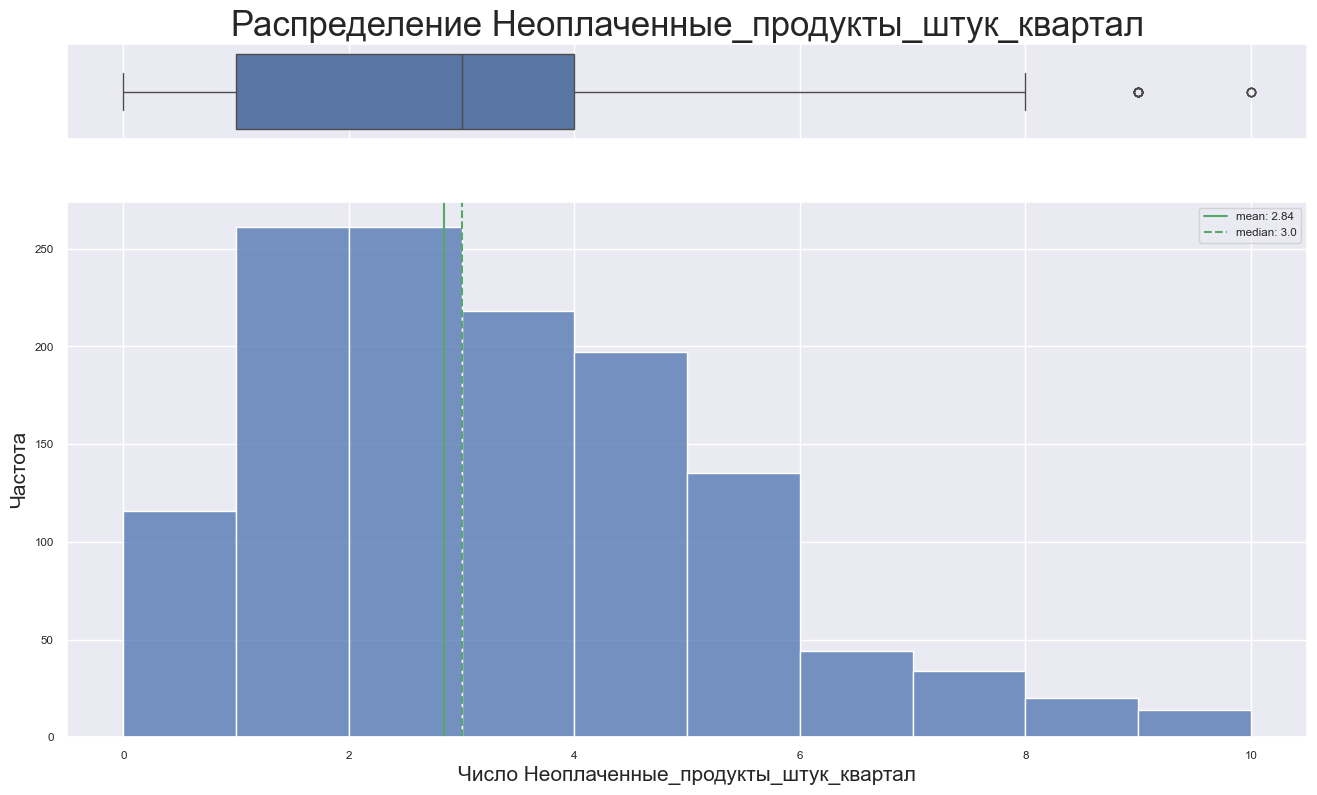

In [33]:
num_analysis(data=market_file, num='Неоплаченные_продукты_штук_квартал', bin_num=10)

Большинство покупателей не оплачивают 1-2 покупк в корзине. 0.3% оставляют 9-10 товаров в корзине. 3% -оплачивают покупки, не оставляя в корзине.

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64

ShapiroResult(statistic=0.9658770561218262, pvalue=6.221483467362438e-17)


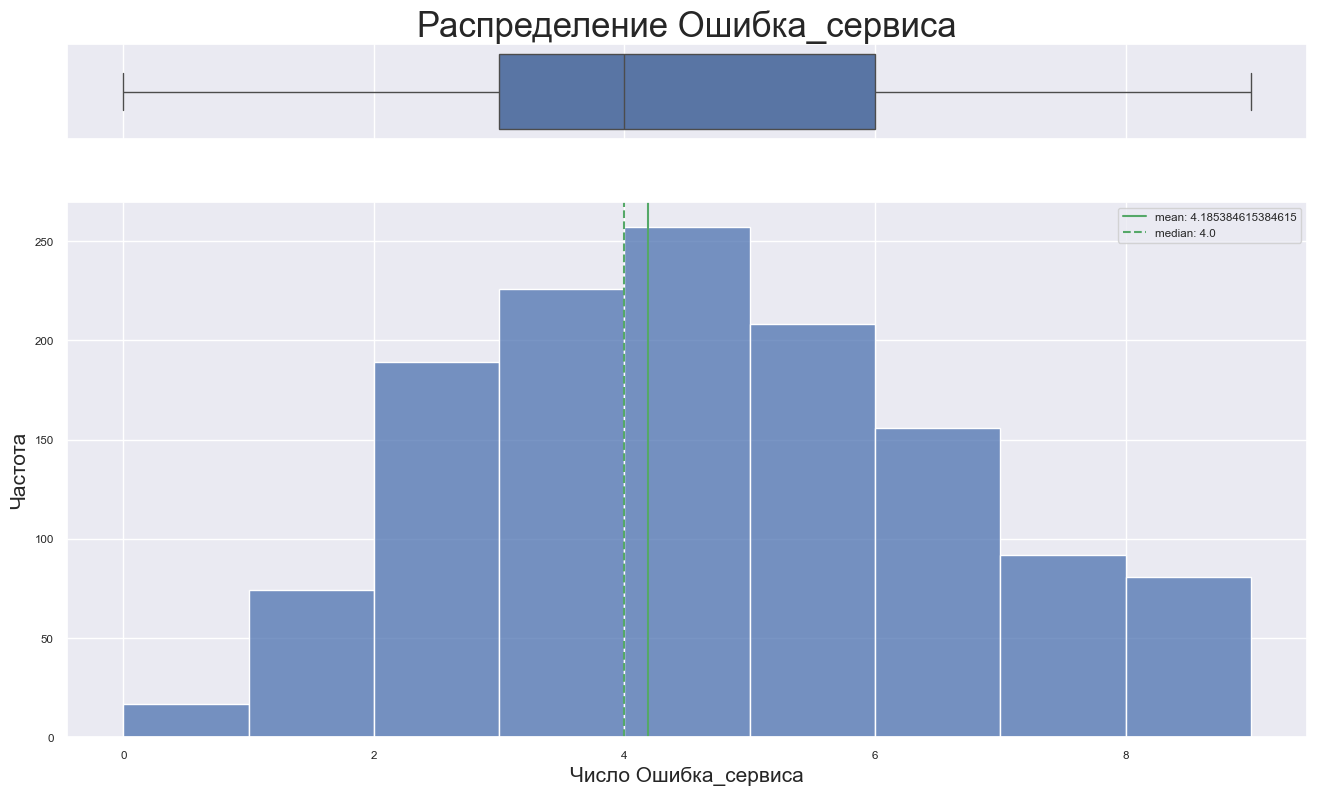

In [34]:
num_analysis(data=market_file, num='Ошибка_сервиса', bin_num=9)

Чаще всего случается 4 сбоя при посещение сайта. Меньше всего, когда нет сбоев.

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64

ShapiroResult(statistic=0.9737658500671387, pvalue=1.2600152109296277e-14)


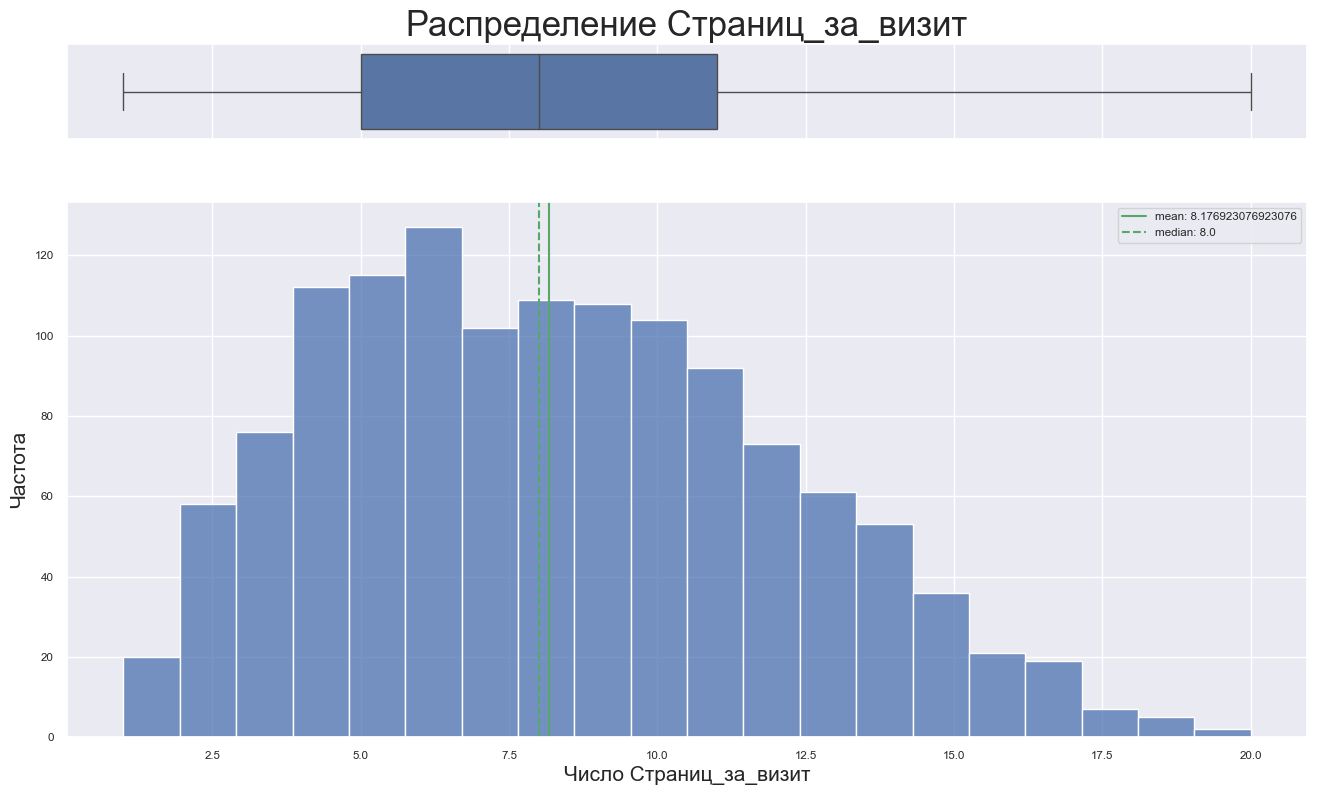

In [35]:
num_analysis(data=market_file, num='Страниц_за_визит')

В среднем пользователи посещают 8 страниц. Меньше всего 15 и более.

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64

ShapiroResult(statistic=0.19781219959259033, pvalue=0.0)


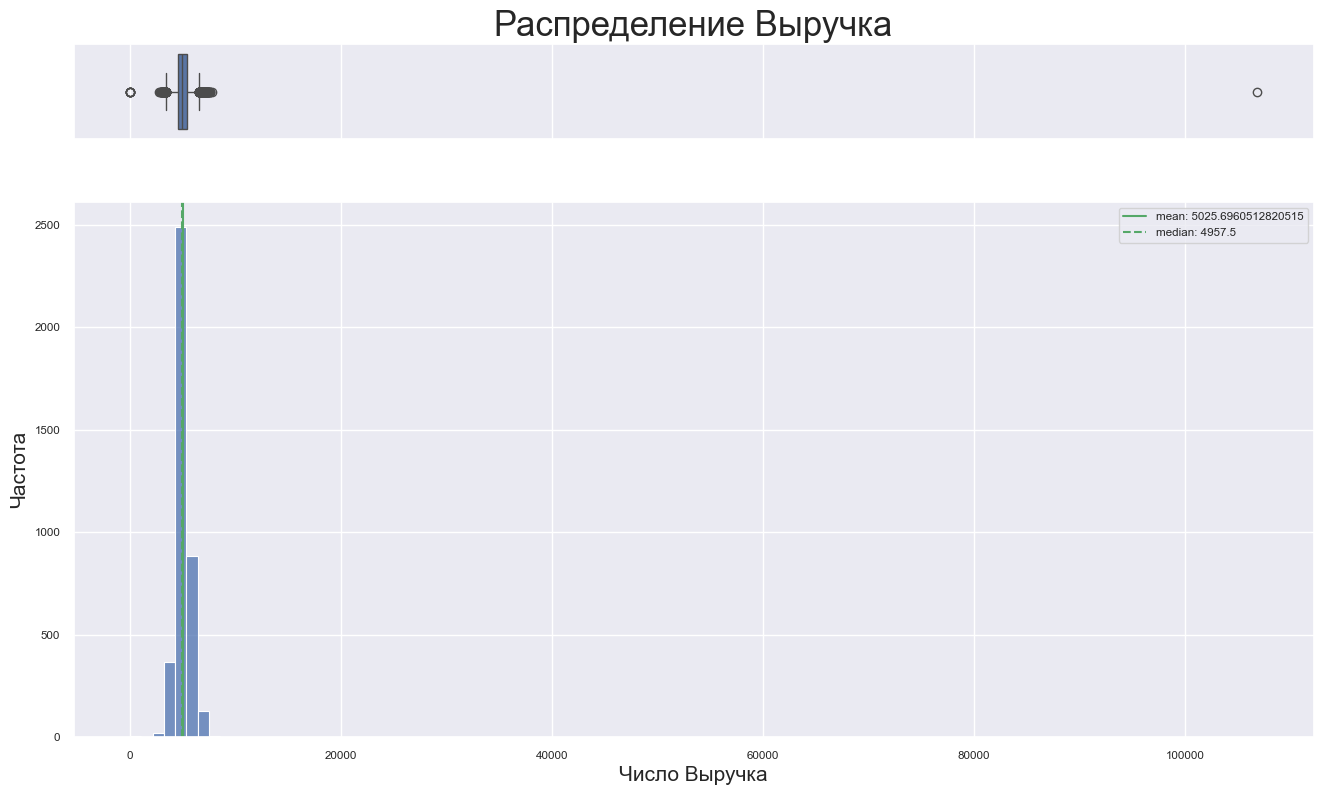

In [36]:
num_analysis(data=market_money, num='Выручка', bin_num=100)

Видим, что присутствуют выбросы в районе 0 и в значение более 100000 руб. Посмотрим, что это за строки.

In [37]:
display(market_money[(market_money['Выручка'] == 0) | (market_money['Выручка'] > 100000)])
print('Строки с нулевой выручкой от общего количества строк:', 
      (str(round((len(market_money[(market_money['Выручка'] == 0)]) / len(market_money)), 4) * 100)) + '%')

id               Период   Выручка
0   215348  препредыдущий_месяц       0.0
2   215348     предыдущий_месяц       0.0
28  215357  препредыдущий_месяц       0.0
29  215357     предыдущий_месяц       0.0
34  215359     предыдущий_месяц       0.0
35  215359  препредыдущий_месяц       0.0
98  215380        текущий_месяц  106862.2

Строки с нулевой выручкой от общего количества строк: 0.15%


Видим, что присутствет 6 записей, которые говорят, что покупатели не принасли выручку интернет-магазину. Эти данные нам не понадобятся для дальнейшего исследования, их можно удлаить.
Предположим, что покупатель и правда сделал выручку в размере 106862.2. Такой случай единчный, и заменим его  медианым значением. 

In [38]:
market_money.drop(market_money
                  .loc[((market_money['id'] == 215348) | (market_money['id'] == 215357) | (market_money['id'] == 215359))]
                  .index, inplace=True)
market_money['Выручка'] = market_money['Выручка'].replace(106862.2, market_money['Выручка'].median())

Нужно также убрать покупателей с 0 выручкой из других датасетов.

In [39]:
for n, _ in df.items():
    _.drop(_
           .loc[((_['id'] == 215348) | (_['id'] == 215357) | (_['id'] == 215359))]
           .index, inplace=True)

Посмотрим, как теперь выглядит `Выручка`.

count    3891.000000
mean     5007.529427
std       679.148872
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: Выручка, dtype: float64

ShapiroResult(statistic=0.9816899299621582, pvalue=4.899023625975406e-22)


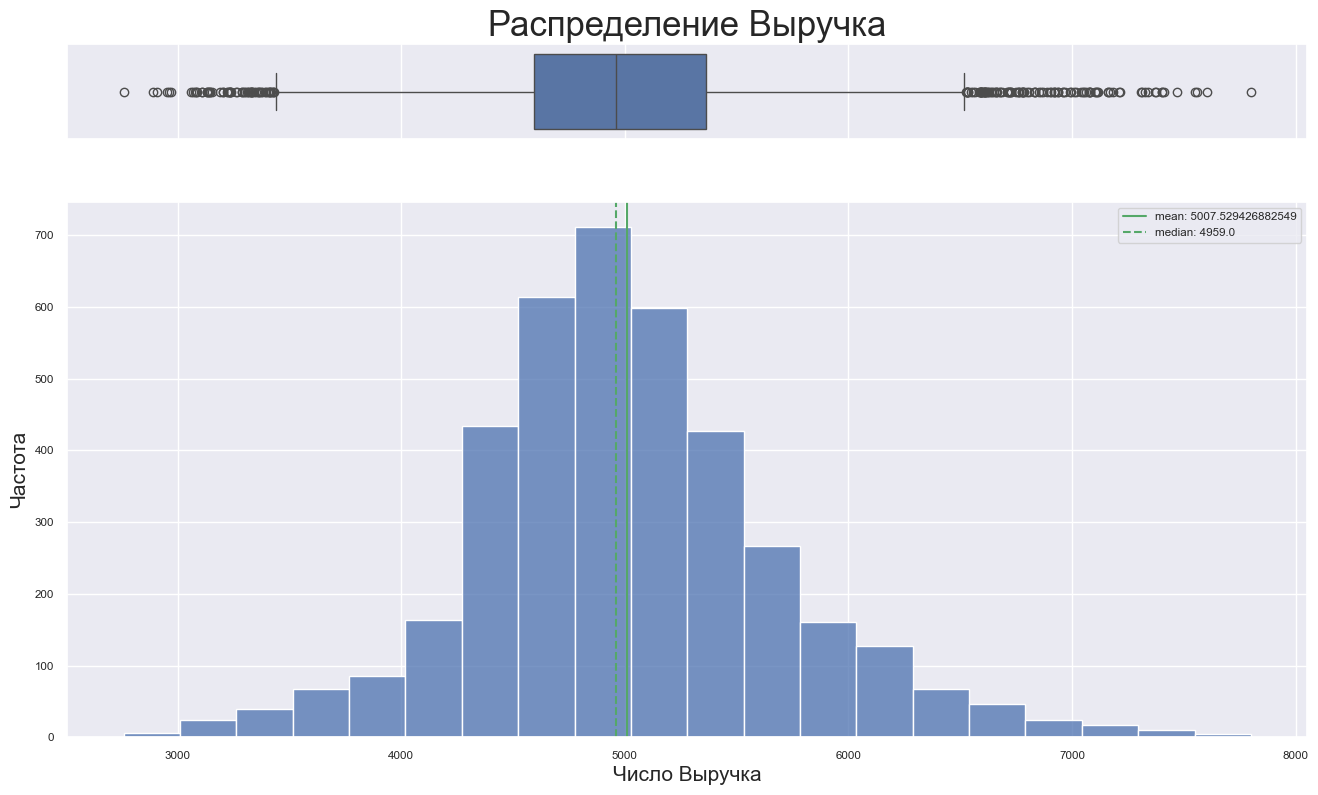

In [40]:
num_analysis(data=market_money, num='Выручка')

В среднем выручка составляет 5008 руб с покупателя. Исходя из полученного теста, `Выручка` не распределена нормально.

count    2594.000000
mean       13.340401
std         4.081999
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

ShapiroResult(statistic=0.9825069308280945, pvalue=2.387142497229429e-17)


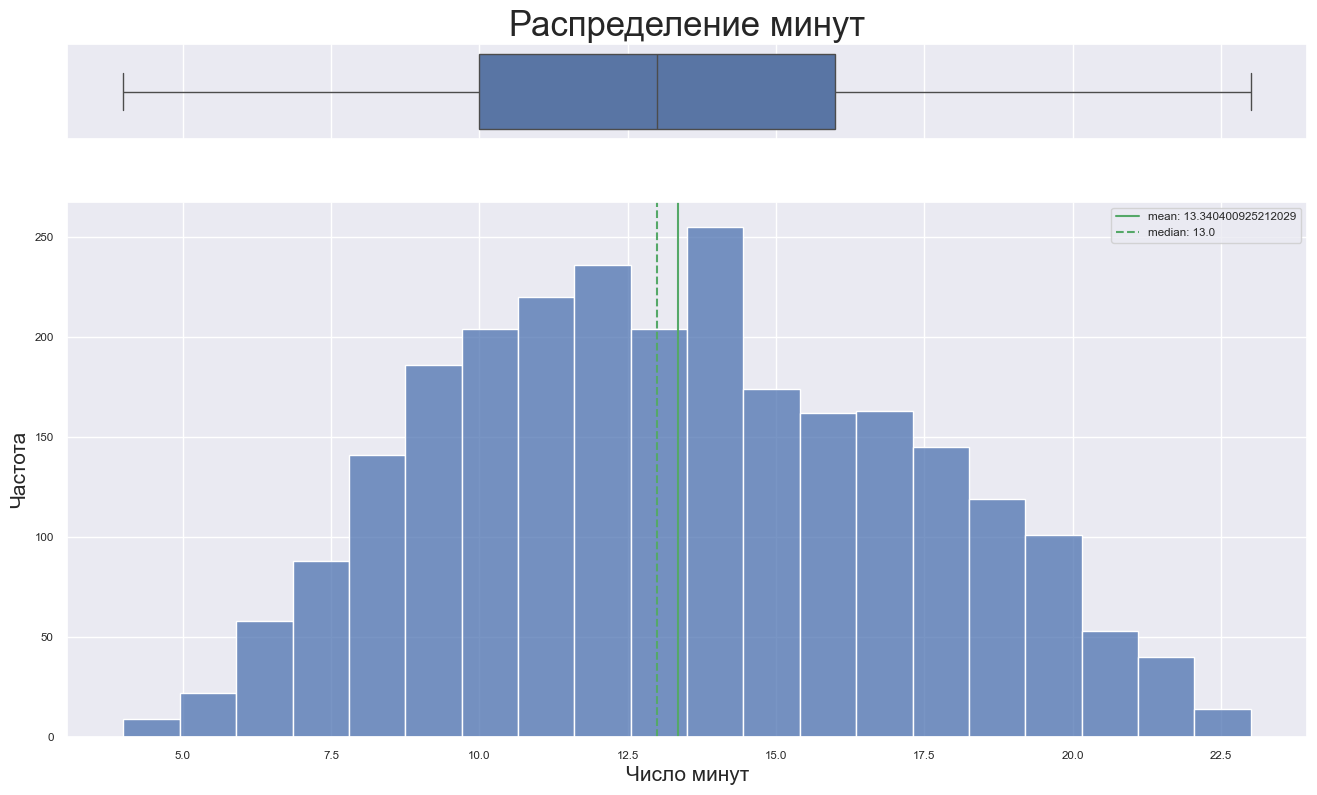

In [41]:
num_analysis(data=market_time, num='минут')

В среднем пользователи проводят на сайте 13 минут. Исходя из полученного теста, `минут` не распределено нормально (pvalue < 0.5)

count    1297.000000
mean     3997.609869
std      1010.813292
min       860.000000
25%      3300.000000
50%      4040.000000
75%      4670.000000
max      7430.000000
Name: Прибыль, dtype: float64

ShapiroResult(statistic=0.998542308807373, pvalue=0.35099291801452637)


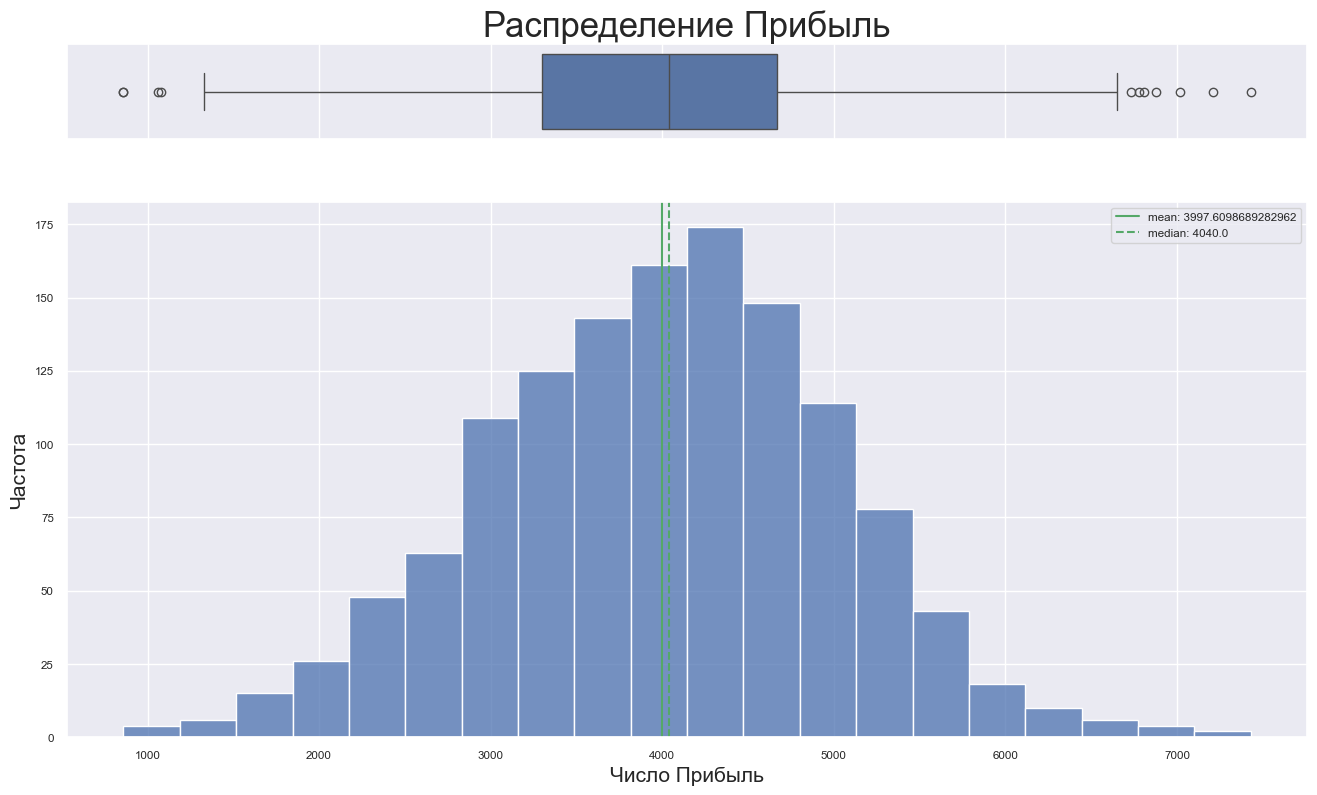

In [42]:
num_analysis(data=money, num='Прибыль')

Средняя прибыль от продаж с по каждому покупателю составляет 3998. Распределение не явлеятся нормальным, т.к. pvalue < 0.5.

### Вывод

В ходе исследования было выявленно:

`market_file`

- `Покупательская_активность` 61.7% (802 записи) имеют прежний уровень, снижение установлено в 38.3% (498 записи) процентах случаях. Виден дисбаланс у групп.
- `Тип_сервиса` в основном преобладает стадарт (71.1% с 924 записями). Премиум всего 28.9% (376 записей). 
- `Разрешить_сообщать` - на рассылку подписаны 74% (962 записи), не подписаны 26% (338 записей).
- `Популярная_категория` - на 1 месте Товары для детей (25.4%, 330 записей), на 2 месте Домашний текстиль (19.3%, 251 запись), на 3 Косметика и аксессуары (17.2%, 223 записи).
- В среднем приходится 4 маркетинговые коммуникации за последние 6 месяцев. Распределение в `Маркет_актив_6_мес` не распределено нормально.
- Больше всего было маркетинговых акций на 4 месяце - 669 (51.5%).
- Признак длительность не распределено нормально (p-value < 0.5). В среднем, люди зарегистрированы 602 дня. Минимально 110, максимально 1079 дней.
- Признак `Акционные_покупки` нужно перевести в категориальную шкалу. В основном преобладают покупки не по акции.
- В среднем посетитили просматриваю 3 категории.
- Большинство покупателей не оплачивают 1-2 покупк в корзине. 0.3% оставляют 9-10 товаров в корзине. 3% -оплачивают покупки, не оставляя в корзине.
- Чаще всего случается 4 сбоя при посещение сайта. Меньше всего, когда нет сбоев.
- В среднем пользователи посещают 8 страниц. Меньше всего 15 и более.

`market_money`

- Периоды равно поделены, в каждом по 1300 значений.
- В среднем выручка составляет 5008 руб с покупателя. Исходя из полученного теста, `Выручка` не распределена нормально. Также заменили медианым значением выручку, которая больше 100000 и убрали 0 выручку. По id-шникам (у которых выручка составляла 0) убрали аналогичные строки в других датасетах.

`market_time`

- Периоды равно поделены по 1300 значений.
- В среднем пользователи проводят на сайте 13 минут. Исходя из полученного теста, `минут` не распределено нормально.

`money`

Средняя прибыль от продаж с по каждому покупателю составляет 3998. Распределение не явлеятся нормальным.

## Объединение таблиц

Для того, чтобы объеденить все таблицы, кроме `money`: 
1. Cведем `market_money` и `market_time` по столбцу `Период`.
2. Объеденим их по все таблицы по `id`.

### Сведем таблицы

Перейдем к первому пункту: сведем таблицы.

In [43]:
market_money_pivot = (market_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='first')
                                  .reset_index())
market_money_pivot.columns = ['id', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц']
market_money_pivot.set_index('id', inplace = True)
#market_money_pivot

In [44]:
market_time_pivot = (market_time.pivot_table(index='id', columns='Период', values='минут', aggfunc='first')
                                  .reset_index())
market_time_pivot.columns = ['id', 'Минут_предыдущий_месяц', 'Минут_текущий_месяц']
market_time_pivot.set_index('id', inplace = True)
#market_time_pivot

Назначим "айдишник" для `market_file`. 

In [45]:
market_file.set_index('id', inplace = True)
#market_file

### Объеденим таблицы

Тепрь объеденим все таблицы.

In [46]:
market = (market_file.merge(market_money_pivot, on = 'id')
                     .merge(market_time_pivot, on = 'id'))
market.head(5)

Покупательская_активность Тип_сервиса Разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   

        Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        Акционные_покупки Популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        Средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

       Доля_акций_от_покупок_06  Выручка_предыдущий_месяц  \
id                                                          
215349             максимальная                    5216.0   
215350              минимальная                    5457.5   
215351             максимальная                    6158.0   
215352             максимальная                    5807.5   
215353              минимальная                    4738.5   

        Выручка_препредыдущий_месяц  Выручка_текущий_месяц  \
id                                                           
215349                       4472.0                 4971.6   
215350                       4826.0                 5058.4   
215351                       4793.0                 6610.4   
215352                       4594.0                 5872.5   
215353                       5124.0                 5388.5   

        Минут_предыдущий_месяц  Минут_текущий_месяц  
id                                                   
215349                      12                   10  
215350                       8                   13  
215351                      11                   13  
215352                       8                   11  
215353                      10                   10

### Вывод

С помощью `pivot_table()` и `merge()` объеденили 3 датасета в 1 (`market`).

## Корреляционный анализ

По условию, требуется провести корелляционный анализ количественных признаков. Т.к. у нас признаки не распределены нормально, используем коэффицент кореляции Спирмена для исследования зависимости между признаками.

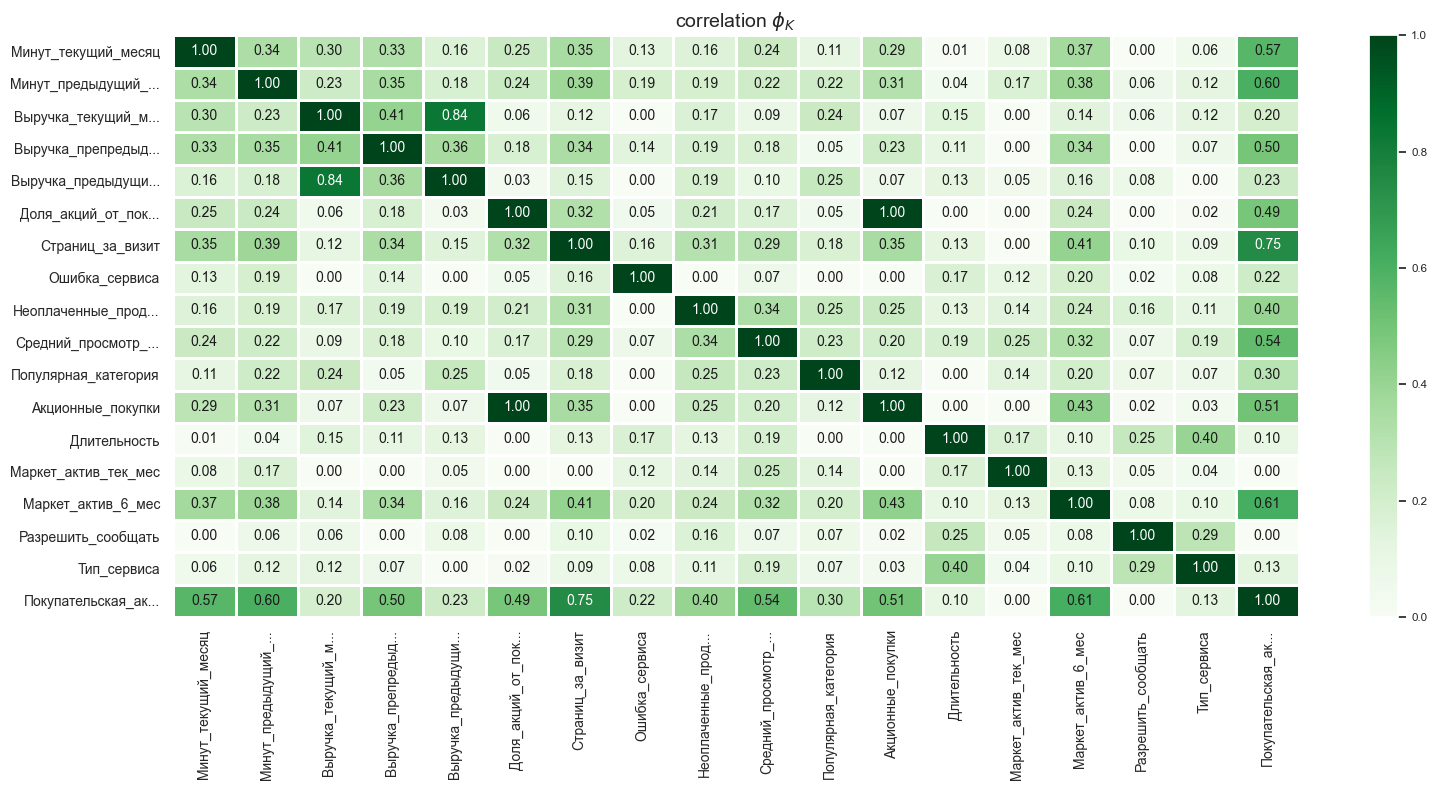

In [53]:
interval_cols = ['Длительность',
                'Акционные_покупки',
                'Выручка_предыдущий_месяц',
                'Выручка_препредыдущий_месяц',
                'Выручка_текущий_месяц']
corr_matrix = market.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(corr_matrix.values, 
                        x_labels=corr_matrix.columns, 
                        y_labels=corr_matrix.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(16, 8));
plt.tight_layout();

- Видим, что `Выручка_предыдущий_месяц` и `Выручка_текущий_месяц` (0.88) достаточно сильно связаны. Скорее всего, в интернет-магазине есть постоянные клиенты, которые регулярно покупают товары.
- Присутствует корреляция между `Доля_акций_от_покупок_06` и `Акционные_покупки`. Это вполне очевидно, так как из последнего вытекает первое.

Посмотрим на графики рассеивания с учетом целевого признака: `Покупательская_активность`.

In [55]:
market_analysis

Маркет_актив_6_мес  Длительность  Акционные_покупки  \
0                    4.4           819               0.75   
1                    4.9           539               0.14   
2                    3.2           896               0.99   
3                    5.1          1064               0.94   
4                    3.3           762               0.26   
...                  ...           ...                ...   
1292                 6.6           318               0.24   
1293                 5.1           454               0.21   
1294                 4.1           586               0.20   
1295                 6.3           645               0.12   
1296                 4.0           906               0.94   

      Выручка_предыдущий_месяц  Выручка_препредыдущий_месяц  \
0                       5216.0                       4472.0   
1                       5457.5                       4826.0   
2                       6158.0                       4793.0   
3                       5807.5                       4594.0   
4                       4738.5                       5124.0   
...                        ...                          ...   
1292                    3664.0                       4704.0   
1293                    4729.0                       5299.0   
1294                    5160.0                       5334.0   
1295                    4923.0                       4725.0   
1296                    4720.0                       5183.0   

      Выручка_текущий_месяц  Минут_предыдущий_месяц  Минут_текущий_месяц  
0                    4971.6                      12                   10  
1                    5058.4                       8                   13  
2                    6610.4                      11                   13  
3                    5872.5                       8                   11  
4                    5388.5                      10                   10  
...                     ...                     ...                  ...  
1292                 4741.7                      14                    7  
1293                 5353.0                      12                   11  
1294                 5139.2                      12                   18  
1295                 5224.6                      18                    7  
1296                 4448.3                      15                   10  

[1297 rows x 8 columns]

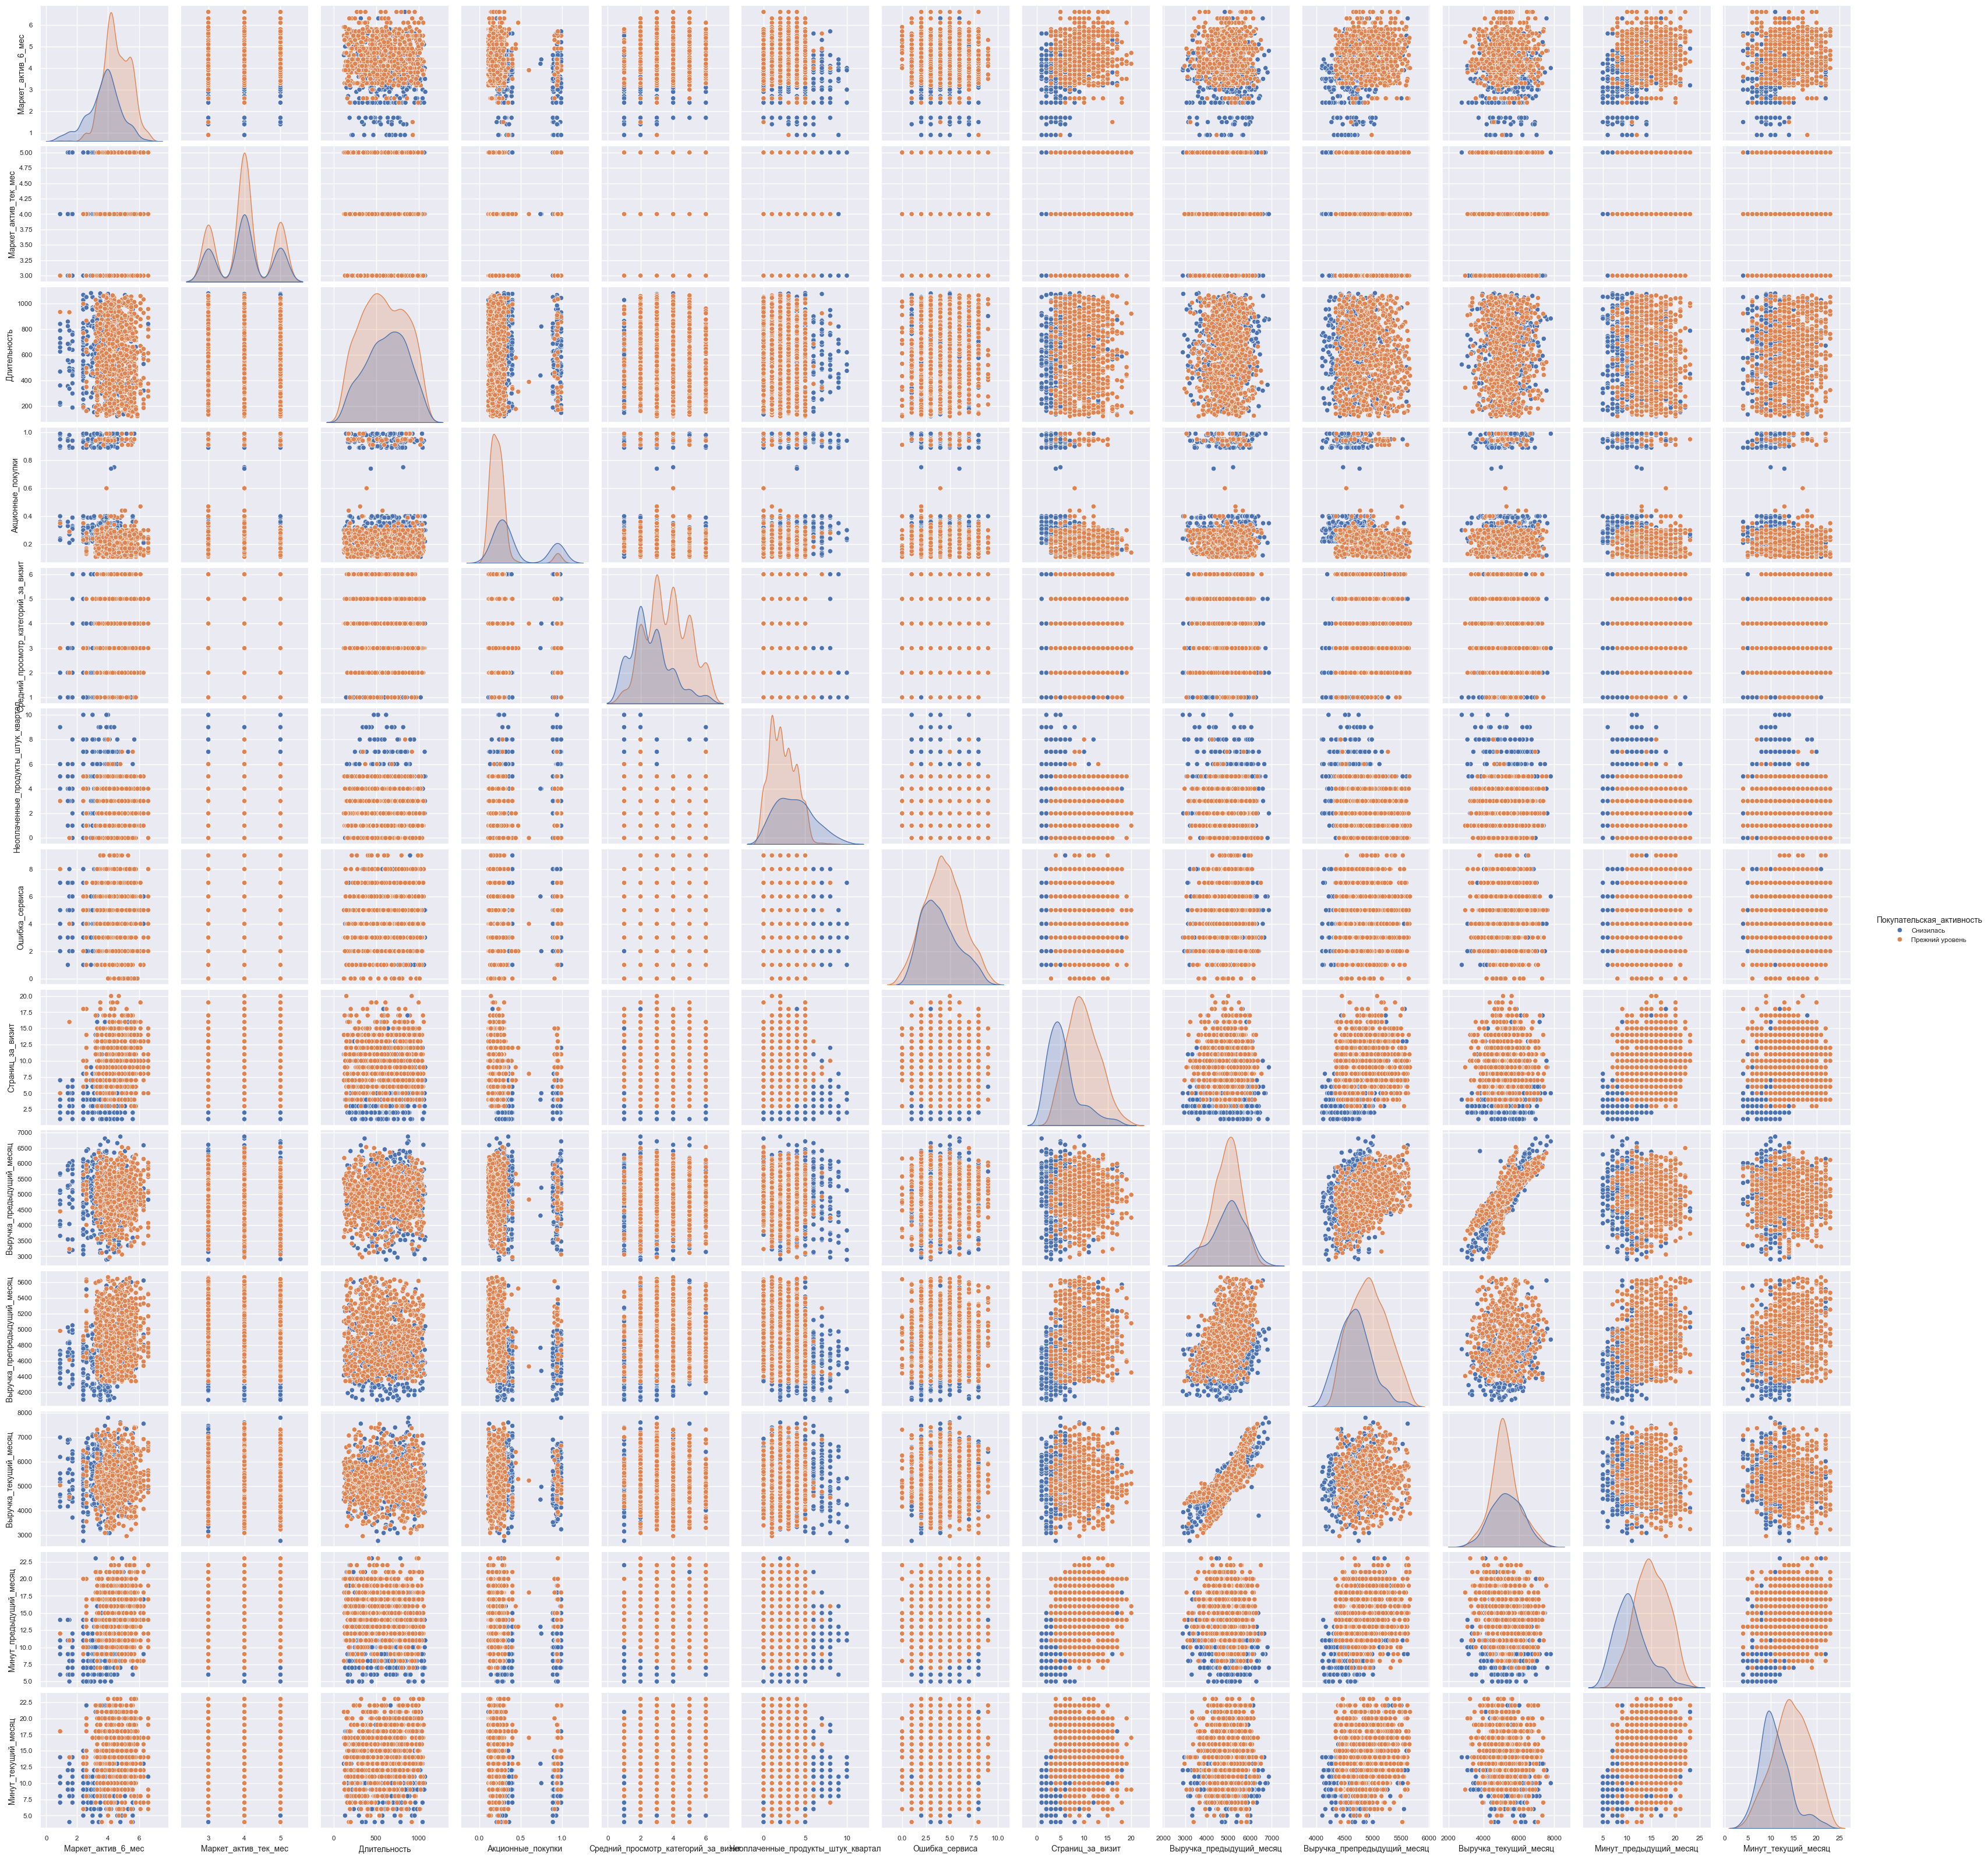

In [56]:
sns.pairplot(market, hue="Покупательская_активность");

- На графиках видим, что большинство признаков не имеют связи, кроме `Выручка_предыдущий_месяц` и `Выручка_текущий_месяц` (похоже на линейную).
- Точки на графиках не образуют четко выделенные кластеры.
- Имеет смысл перевести `Акционные_покупки` в категориальную шкалу. (уже выше сделано)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍

Я бы с осторожностью переводил акции в категориальный признак, так как это снизит детальность данных для аналитики. В том числе при интерпретации важности признаков с помощью Shap. Однако в целом логика понятна и вполне вероятно, что такое преобразование несколько улучшает качество моделей.
    
***
    
UPD - ниже по графику вижу, что все оторбажается корректно, искажений нет. Думаю, категоризация оправдана.
       
</div> 
  


### Вывод

- `Выручка_предыдущий_месяц` и `Выручка_текущий_месяц` (0.88) достаточно сильно связаны. Скорее всего, в интернет-магазине есть постоянные клиенты, которые регулярно покупают товары.
- Присутствует корреляция между `Доля_акций_от_покупок_06` и `Акционные_покупки`. Это вполне очевидно, так как из последнего вытекает первое.
- На графиках видим, что большинство признаков не имеют связи, кроме `Выручка_предыдущий_месяц` и `Выручка_текущий_месяц` (похоже на линейную).
- Точки на графиках не образуют четко выделенные кластеры.
- Имеет смысл перевести `Акционные_покупки` в категориальную шкалу. 

## Использование пайплайнов

### Резделим данные на тестовый, тренировочные и валидационные выборки

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    market.drop(['Покупательская_активность', 'Доля_акций_от_покупок_06'], axis=1),
    market['Покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market['Покупательская_активность'])

X_train.shape, X_test.shape

((972, 16), (325, 16))

### Создадим списки с названиями признаков

In [58]:
ohe_columns = ['Тип_сервиса','Разрешить_сообщать']
ord_columns = ['Популярная_категория']
num_columns = ['Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
               'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц',
               'Выручка_текущий_месяц', 'Минут_предыдущий_месяц', 'Минут_текущий_месяц'] 

### Создадим пайплайн для подготовки признаков из списка `ohe_columns`

In [59]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

### Создадим пайплайн для подготовки признаков из списка `ord_columns`

In [60]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories= [['Товары для детей', 'Домашний текстиль', 'Косметика и аксессуары',
                             'Кухонная посуда', 'Техника для красоты и здоровья', 'Мелкая бытовая техника и электроника']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

### Создадим общий пайплайн для подготовки данных

In [61]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

### Cоздадим итоговый пайплайн

In [62]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Теперь создадим словарь для перебора гипперпарметров моделей

In [63]:
param_grid = [
    
        # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
        # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
        # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
        # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['linear','rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
    
]

Используем метод оптимизации гиперпараметров модели `RandomizedSearchCV`.

In [64]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

C:\Users\ksyub\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Тип_сервиса',
                                                                                'Разрешить_сообщать']),
                                                                              ('ord',
                                                                               Pipeline(steps=[...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__kernel': ['linear', 'rbf',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [65]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип_сервиса',
                                                   'Разрешить_сообщать']),
                                                 ('ord',
                                          

In [66]:
model = randomized_search.best_estimator_
model_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [67]:
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_prob)}')

Метрика ROC-AUC на тестовой выборке: 0.9232867918472156


Логистическая модель оказалась лучшем с ROC-AUC=0.92.

### Вывод

На данном шаге мы использовали пайплайн, чтобы определить лучшую модель для наших данных:

- Отобрали количественные и категориальные признаки.
- Обучили 4 модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(), как минимум с 1 гиперпараметром.
- Лучшей моделью оказалась логистическая ROC-AUC=0.92.

Выбор метрики ROC-AUC не случаен. Ее применяют в случае дисбаланса при бинарной классификации. Т.к. у нас дисбаланс несильно большой для нашей модели, то лучше всего подходит данная метрика. Если бы была ситуация, когда разбалнсировка была бы более значительной, то лучше применять метрику F1. 

## Анализ важности признаков

На данном шаге определим значимость признаков,

In [68]:
y_train

id
215858    Прежний уровень
215361          Снизилась
215884    Прежний уровень
216563    Прежний уровень
215714          Снизилась
               ...       
216157    Прежний уровень
216177    Прежний уровень
215802          Снизилась
215863    Прежний уровень
216030    Прежний уровень
Name: Покупательская_активность, Length: 972, dtype: object

### Оценим важность признаков с помощью метода SHAP

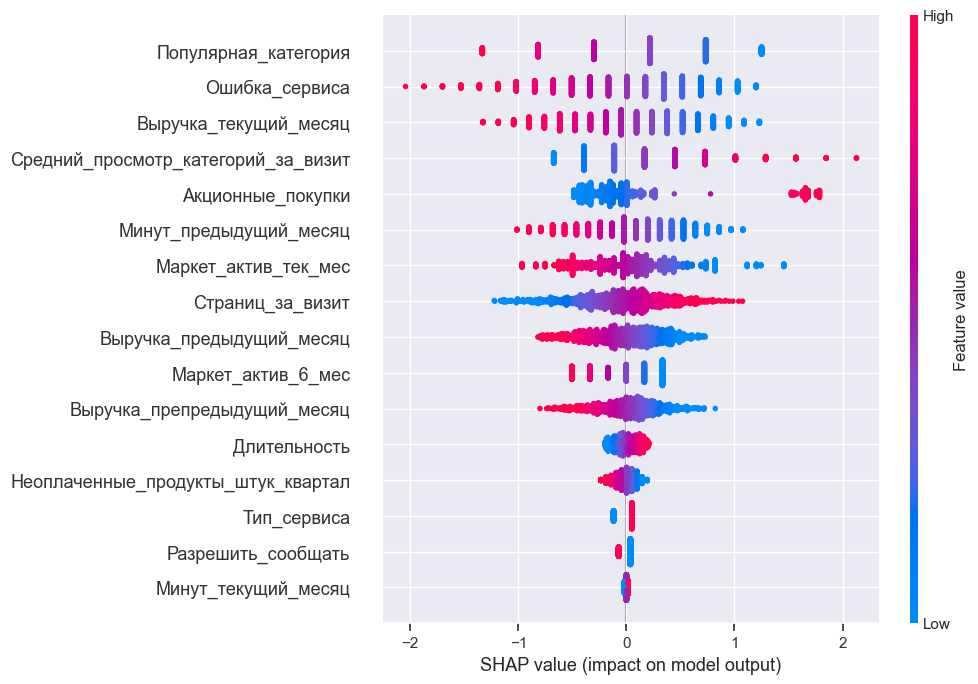

In [69]:
X_train_encoder = model['preprocessor'].fit_transform(X_train)
model_log = model['models'].fit(X_train_encoder, y_train)

explainer = shap.Explainer(model_log, 
                           X_train_encoder, 
                           feature_names=X_train.columns)
shap_values = explainer(X_train_encoder)

shap.plots.beeswarm(shap_values, max_display=20)

### Вывод

1. Малозначимыми признаки являются: `Длительность`, `Неоплаченные_продукты_штук_квартал`, `Тип_сервиса`, `Разрешить_сообщать`, `Минут_текущий_месяц`.
2. Признаки, которые влияют больше на снижение покупательской активности: `Популярная_категория`, `Ошибка_сервиса`, `Выручка_текущий_месяц`, `Средний_просмотр_категорий_за_визит`, `Акционные_покупки`.

Из рекомендаций стоит пересмотреть ассортимент в менее популярных категориях, пофиксить баги на сайте, сделать внутренюю перелинковку страниц, а также подумать над новым маркетинговым продвижением для увеличения выручки.

## Сегментация покупателей

### Выполнить сегментацию покупателе

Добавим `y_prob` в `X_test`.

In [70]:
X_test['Вероятность'] = y_prob

Далее посмотрим на группу клиентов, у которых с большей вероятностью снизится покупательская активность, но при этом они сделают выручку хорошую выручку в текущем месяце.

count     114.000000
mean     5332.938596
std       844.616398
min      3334.600000
25%      4700.950000
50%      5434.100000
75%      5945.500000
max      6957.700000
Name: Выручка_текущий_месяц, dtype: float64

ShapiroResult(statistic=0.9795234203338623, pvalue=0.07799980789422989)


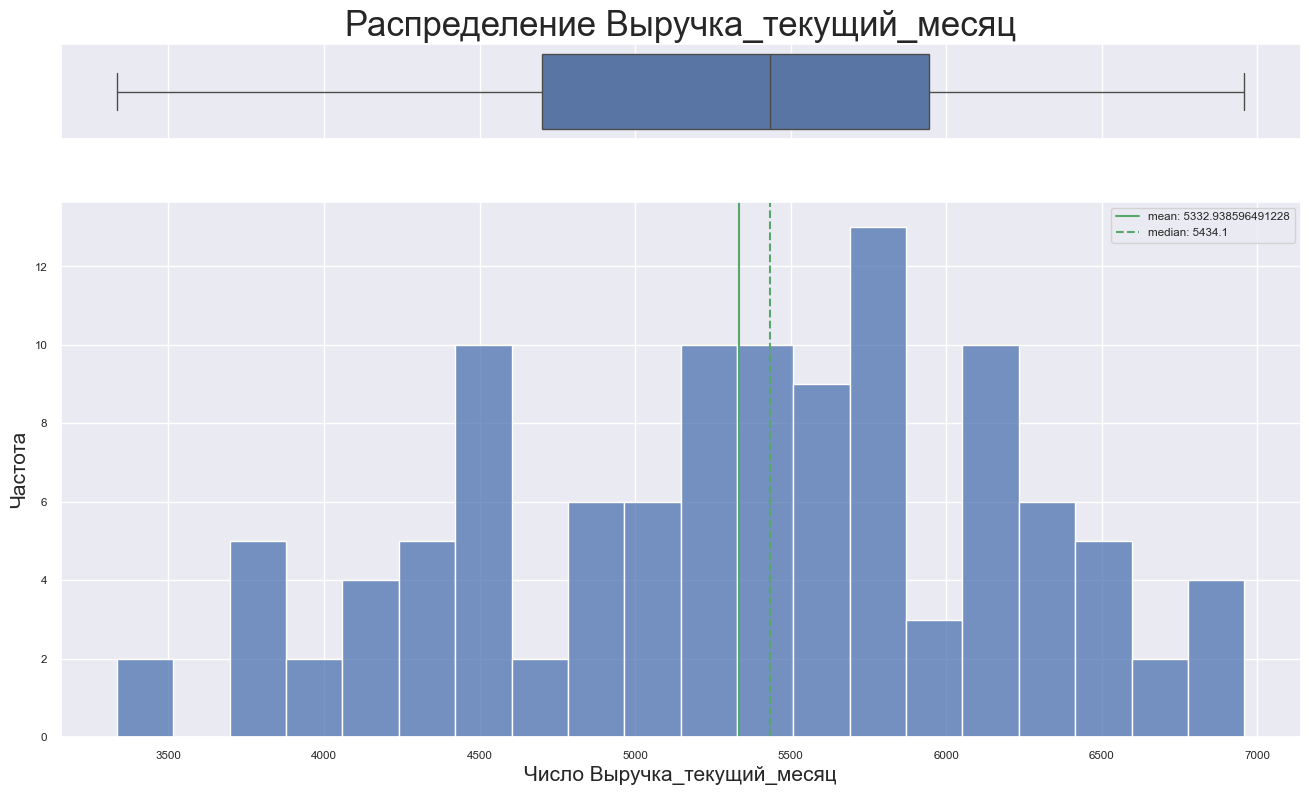

In [71]:
X_test_05 = X_test[X_test['Вероятность'] > 0.5]
num_analysis(data=X_test_05, num='Выручка_текущий_месяц')

Возьмем выручку не менее 5435.

In [72]:
X_test_05 = X_test[X_test['Выручка_текущий_месяц'] >= 5435]

### Отобрать группу покупателей и предложить, как увеличить её покупательскую активность

Для того, чтобы понять как увеличить покупательскую активность нужно расмотреть признаки `Маркет_актив_6_мес`, `Страниц_за_визит`, `Выручка_текущий_месяц`, `Выручка_препредыдущий_месяц`, `Минут_предыдущий_месяц` и `Минут_текущий_месяц` с ранее отобранной группой покупателей.

In [73]:
def activity(y_act):
    sns.scatterplot(x='Вероятность', y=y_act, data= X_test_05)
    plt.title(f'Зависимости вероятности от {y_act}', fontsize=25)

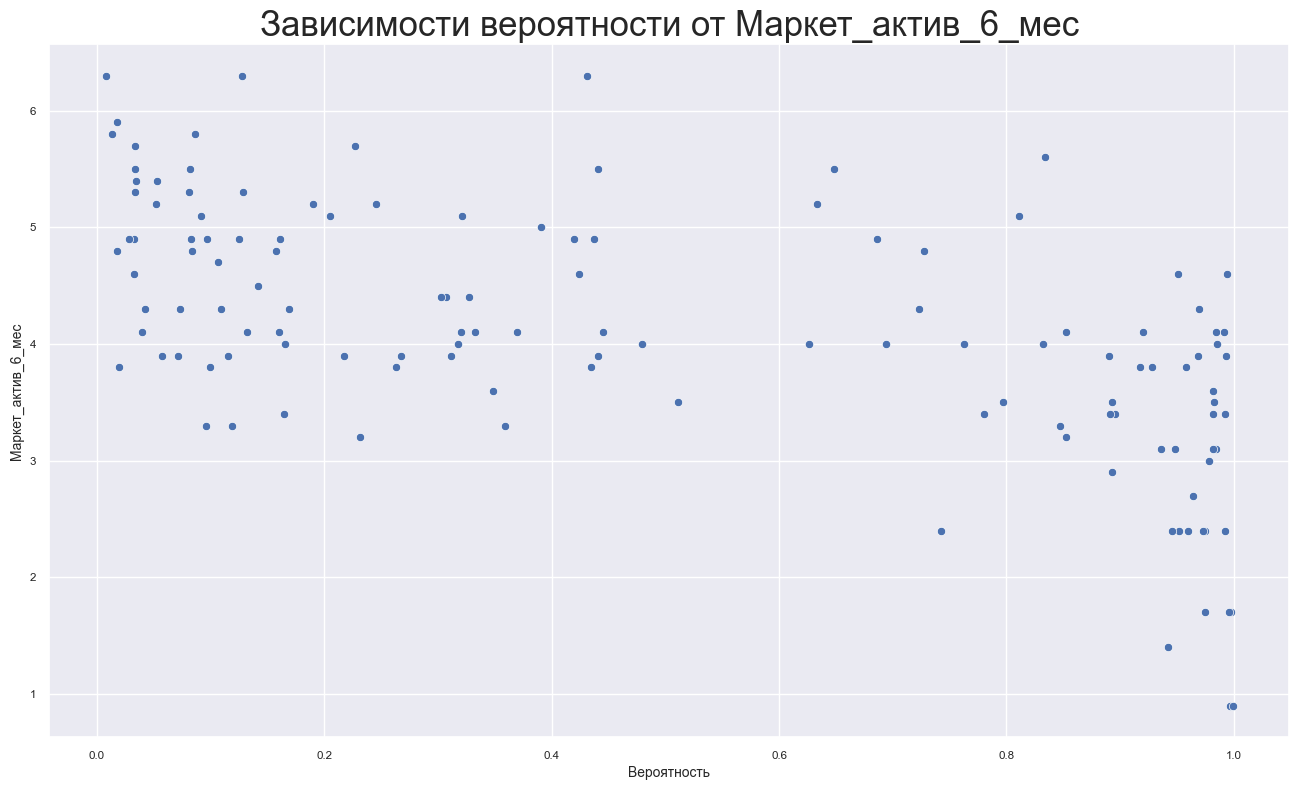

In [74]:
activity(y_act='Маркет_актив_6_мес')

Видим, что клиенты, которые приносят большую выручку и имеют высокую вероятность снижения активности, обычно получают меньше 4 маркетинговых коммуникаций в месяц. Тем, с кем проводится 4-6 коммуникаций, вероятность снижения активности ниже.

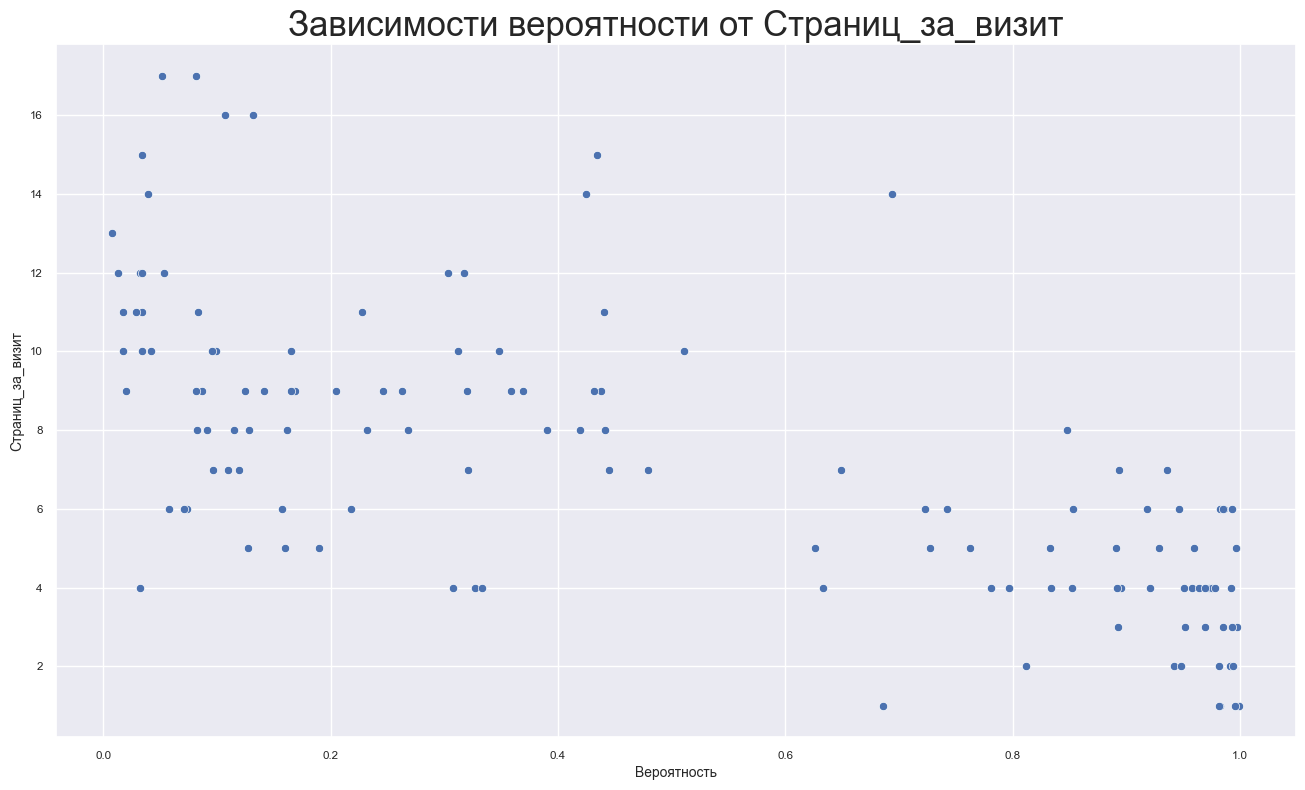

In [75]:
activity(y_act='Страниц_за_визит')

На графике видим, что пользователи с высокой вероятностью снижения активности обычно просматривают до 8 страниц за визит. В то же время большинство из покупателей с низкой вероятностью просматривают 8 и более страниц за визит.

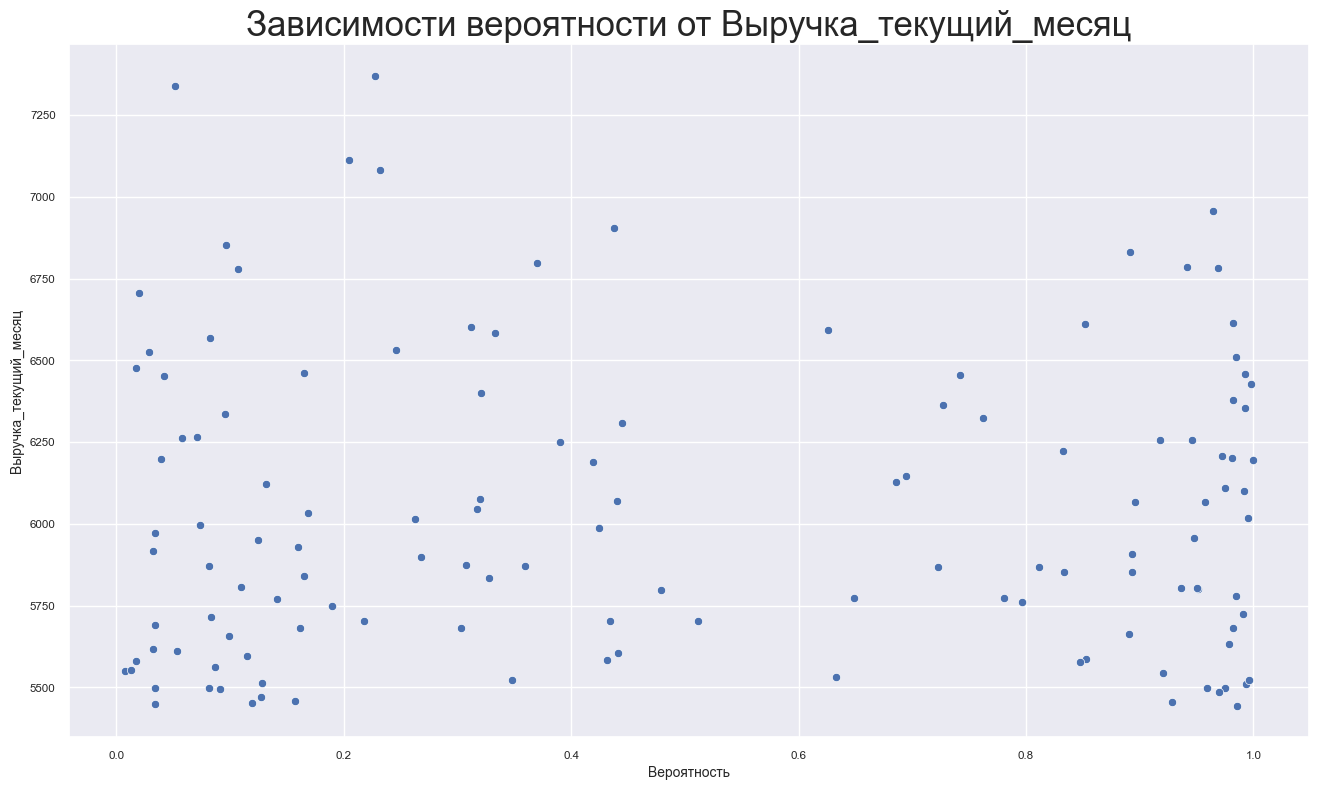

In [76]:
activity(y_act='Выручка_текущий_месяц')

Из графика можно сделать вывод, что у клиентов, чей объем выручки превышает 7000, вероятность снижения активности значительно ниже по сравнению с другими покупателями.

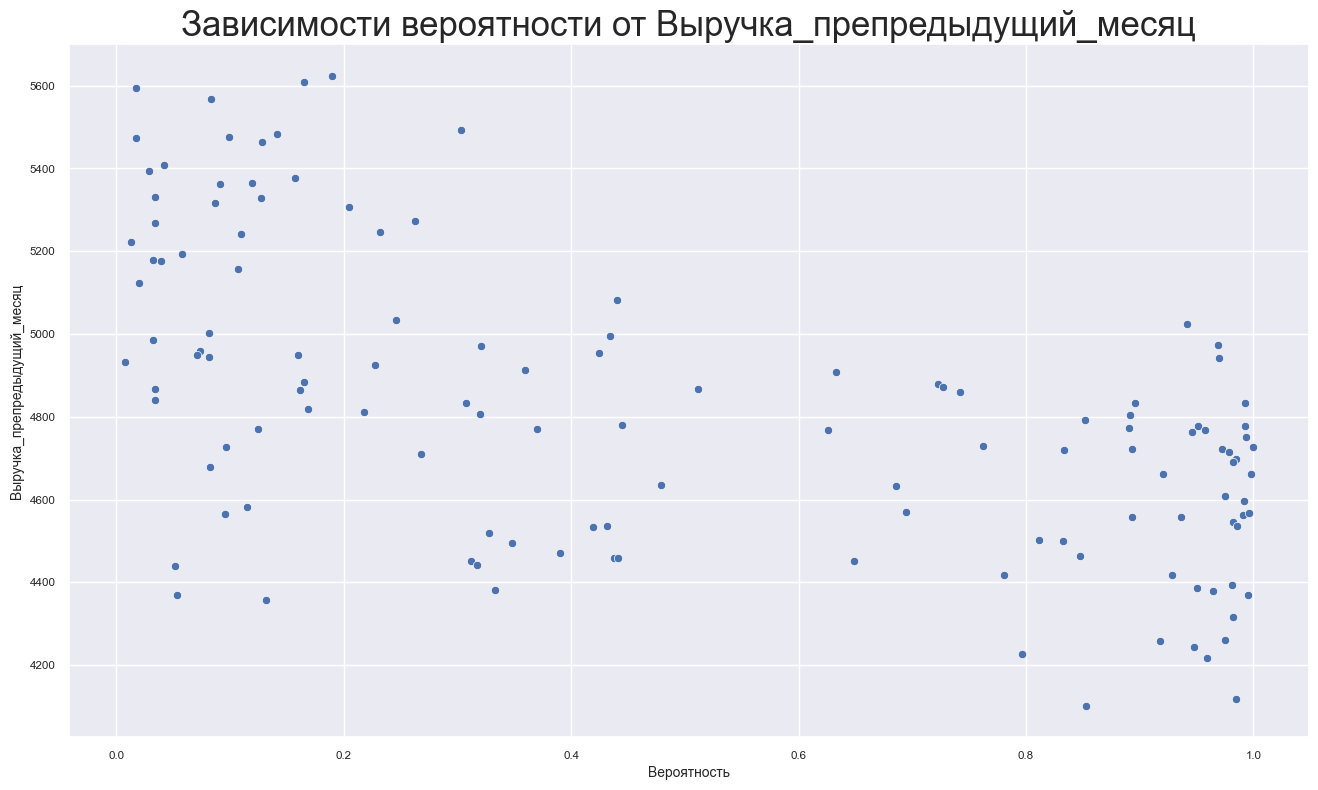

In [77]:
activity(y_act='Выручка_препредыдущий_месяц')

Видим, что покупатели из указанной группы, у которых вероятность снижения активности низкая, совершили более крупные покупки в предыдущем месяце по сравнению с остальными.

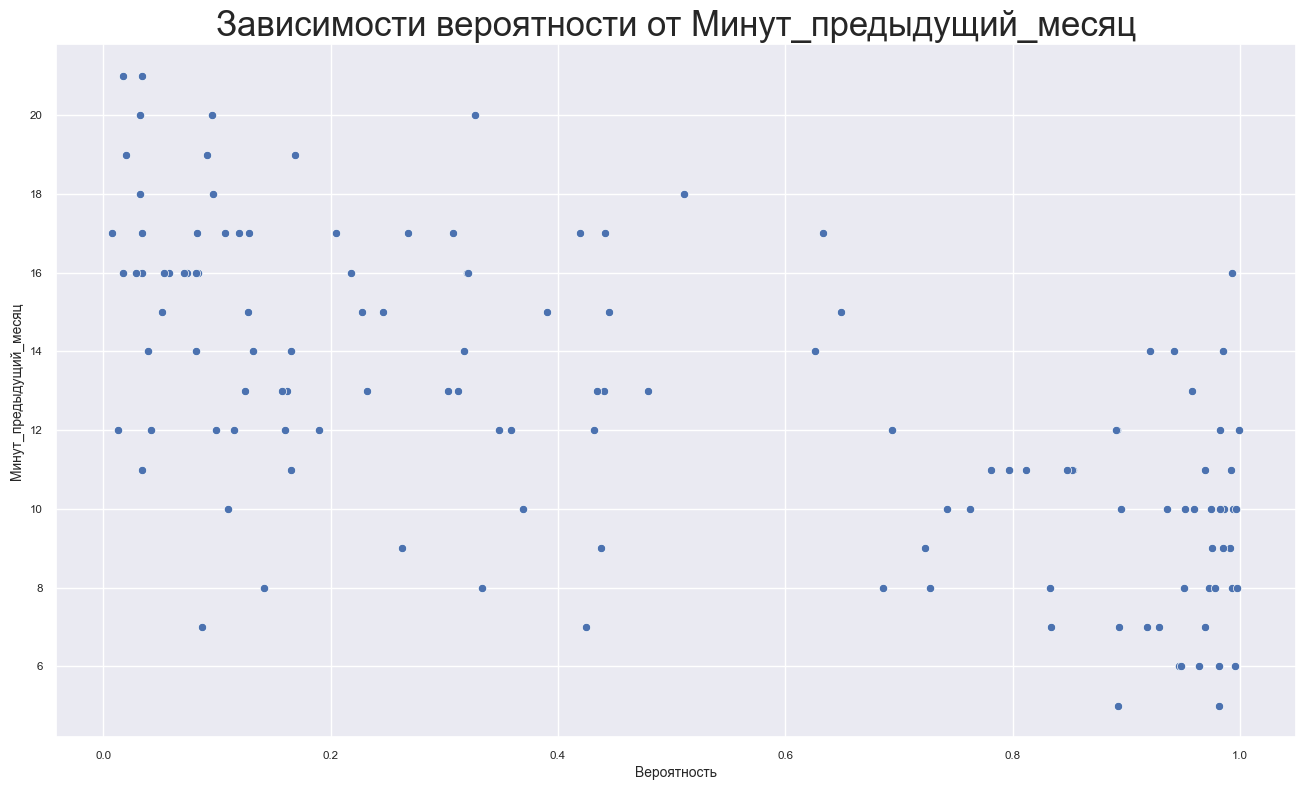

In [78]:
activity(y_act='Минут_предыдущий_месяц')

Исходя из графика, клиенты с высокой вероятностью снижения активности обычно проводят на сайте менее 12 минут, преимущественно 6-14 минут. В то время как покупатели с низкой вероятностью снижения активности остаются на сайте в диапазоне 8-20 минут.

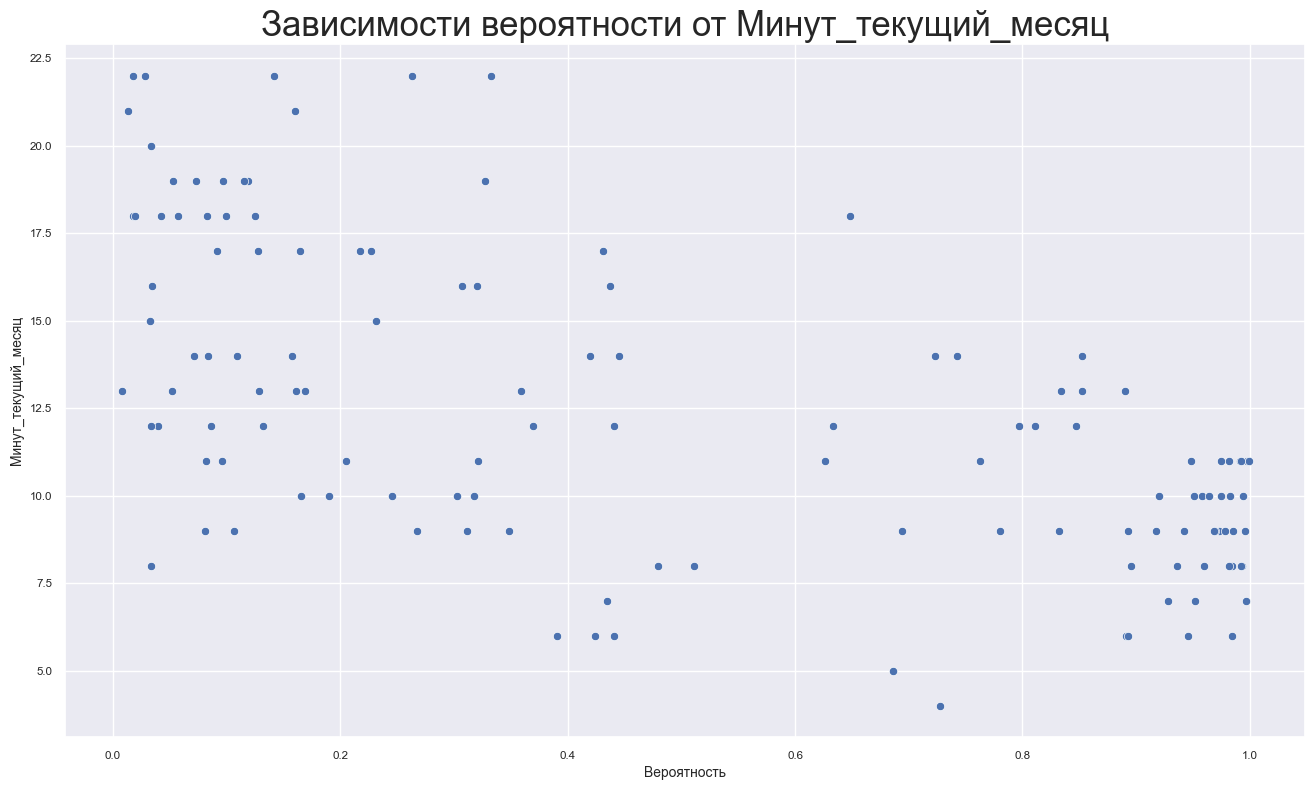

In [79]:
activity(y_act='Минут_текущий_месяц')

Здесь аналогичная ситуация, что и в первом случае.

Как я считаю, для интернет-магазина «В один клик» (да и в целом для любого бизнеса) яляется увеличение своей прибыли, значит данный показатель у покупателей должны быть высокий. Логично предположить, если заказчик поставил задчау сделать модель с пердсказанием вероятности снижения активности покупателей, то скорее всего, есть некая тенденция оттока постоянных клиентов у магазина. Визуализируем взаимосвязь признаков на графике.

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Да, кажется, что логично начать с прибыли. 
</div>

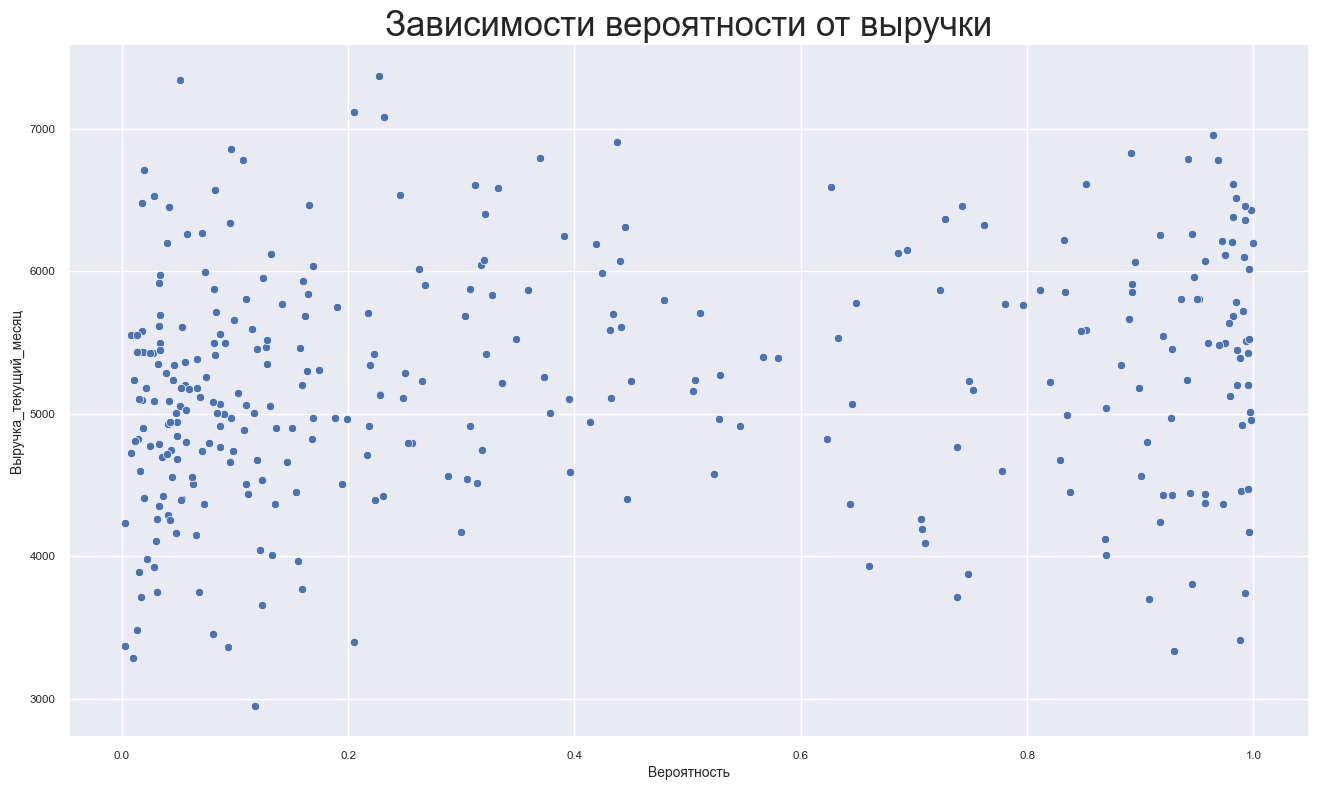

In [80]:
sns.scatterplot(x='Вероятность', y='Выручка_текущий_месяц', data= X_test);
plt.title(f'Зависимости вероятности от выручки', fontsize=25);

На графике видно, что вероятность снижения покупательской активности, начинается с 0.6, а прибыльность с 4000. Возьмем их в качестве границ.

In [81]:
X_test_06_4000 = X_test[(X_test['Выручка_текущий_месяц'] >= 4000) & (X_test['Вероятность'] > 0.6)]
X_test_06_4000.reset_index(inplace= True)
X_test_06_4000

id Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
0   215469     премиум                 да                 4.1   
1   215713    стандарт                 да                 4.6   
2   215356    стандарт                 да                 4.2   
3   215844     премиум                 да                 4.3   
4   215642     премиум                 да                 3.8   
..     ...         ...                ...                 ...   
92  215579    стандарт                нет                 3.6   
93  215384    стандарт                 да                 4.0   
94  215669    стандарт                 да                 4.1   
95  216607    стандарт                 да                 3.3   
96  215398     премиум                 да                 3.5   

    Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                      3           813               0.22   
1                      5           293               0.24   
2                      4           192               0.14   
3                      4          1041               0.99   
4                      4           962               0.30   
..                   ...           ...                ...   
92                     3           710               0.36   
93                     4          1020               0.34   
94                     3           551               0.94   
95                     4           575               0.23   
96                     5           882               0.22   

                    Популярная_категория  Средний_просмотр_категорий_за_визит  \
0                      Домашний текстиль                                    3   
1                       Товары для детей                                    1   
2                 Косметика и аксессуары                                    2   
3                        Кухонная посуда                                    4   
4                 Косметика и аксессуары                                    2   
..                                   ...                                  ...   
92                      Товары для детей                                    3   
93                Косметика и аксессуары                                    2   
94                      Товары для детей                                    2   
95                      Товары для детей                                    2   
96  Мелкая бытовая техника и электроника                                    3   

    Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                    3               4                 5   
1                                    3               3                 3   
2                                    2               1                 3   
3                                    1               6                 6   
4                                    2               2                 5   
..                                 ...             ...               ...   
92                                   5               2                 1   
93                                   3               8                 3   
94                                   3               3                 5   
95                                   4               5                 8   
96                                   2               6                 3   

    Выручка_предыдущий_месяц  Выручка_препредыдущий_месяц  \
0                     5403.5                       4889.0   
1                     4821.0                       4872.0   
2                     4146.5                       4433.0   
3                     5339.0                       4880.0   
4                     4857.0                       4419.0   
..                       ...                          ...   
92                    5516.5                       4393.0   
93                    3584.0                       4226.0   
94                    5213.0                       4934.0  

count    97.000000
mean      3.569072
std       1.021270
min       0.900000
25%       3.100000
50%       3.800000
75%       4.100000
max       5.600000
Name: Маркет_актив_6_мес, dtype: float64

ShapiroResult(statistic=0.9532284736633301, pvalue=0.001662445138208568)


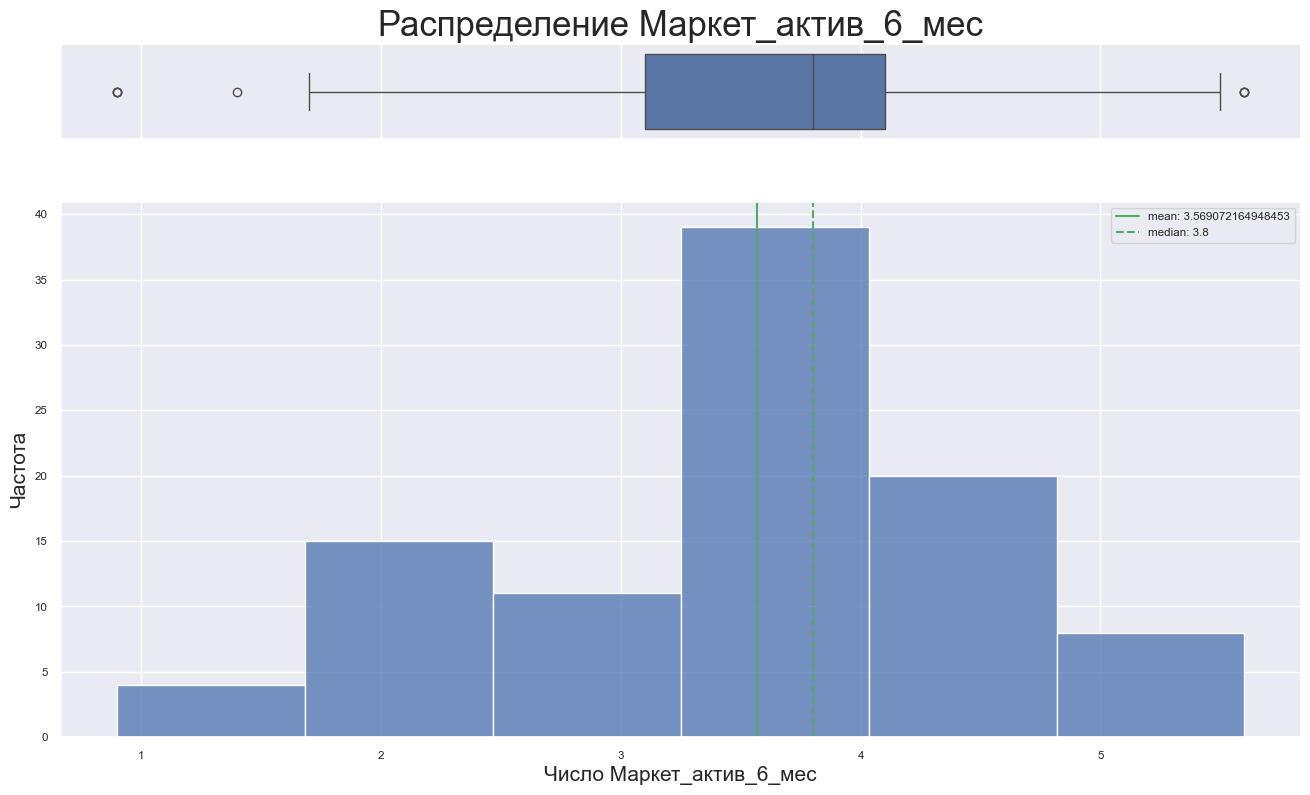

In [82]:
num_analysis(data=X_test_06_4000, num='Маркет_актив_6_мес', bin_num=6)

В среднем, для покупателей с всокой вероятностью низкой активности проводили также 4 активности за 6 месяцев, если сравнивать с исследовательским этапом.

count    97.000000
mean      3.979381
std       0.706803
min       3.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Маркет_актив_тек_мес, dtype: float64

ShapiroResult(statistic=0.8067968487739563, pvalue=6.106442573816651e-10)


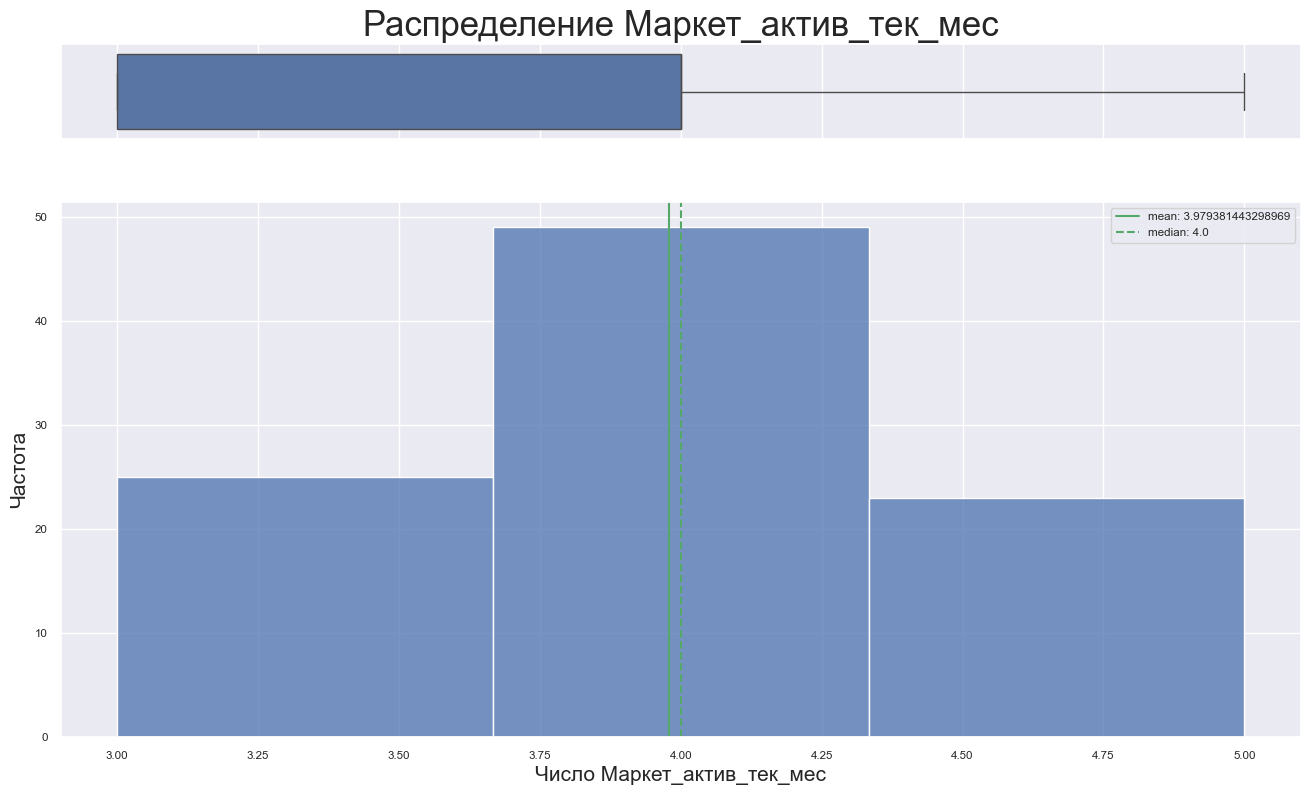

In [83]:
num_analysis(data=X_test_06_4000, num='Маркет_актив_тек_мес', bin_num=3)

В среднем, для сегмента покупателей с низкой активностью и высокой доходностью проводиться 4 акции в текущем месяц. Точно также, как и в общих данных.

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\2822879249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_06_4000['Доля_акций_от_покупок_06'] = X_test_06_4000['Акционные_покупки'].apply(sale)
C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


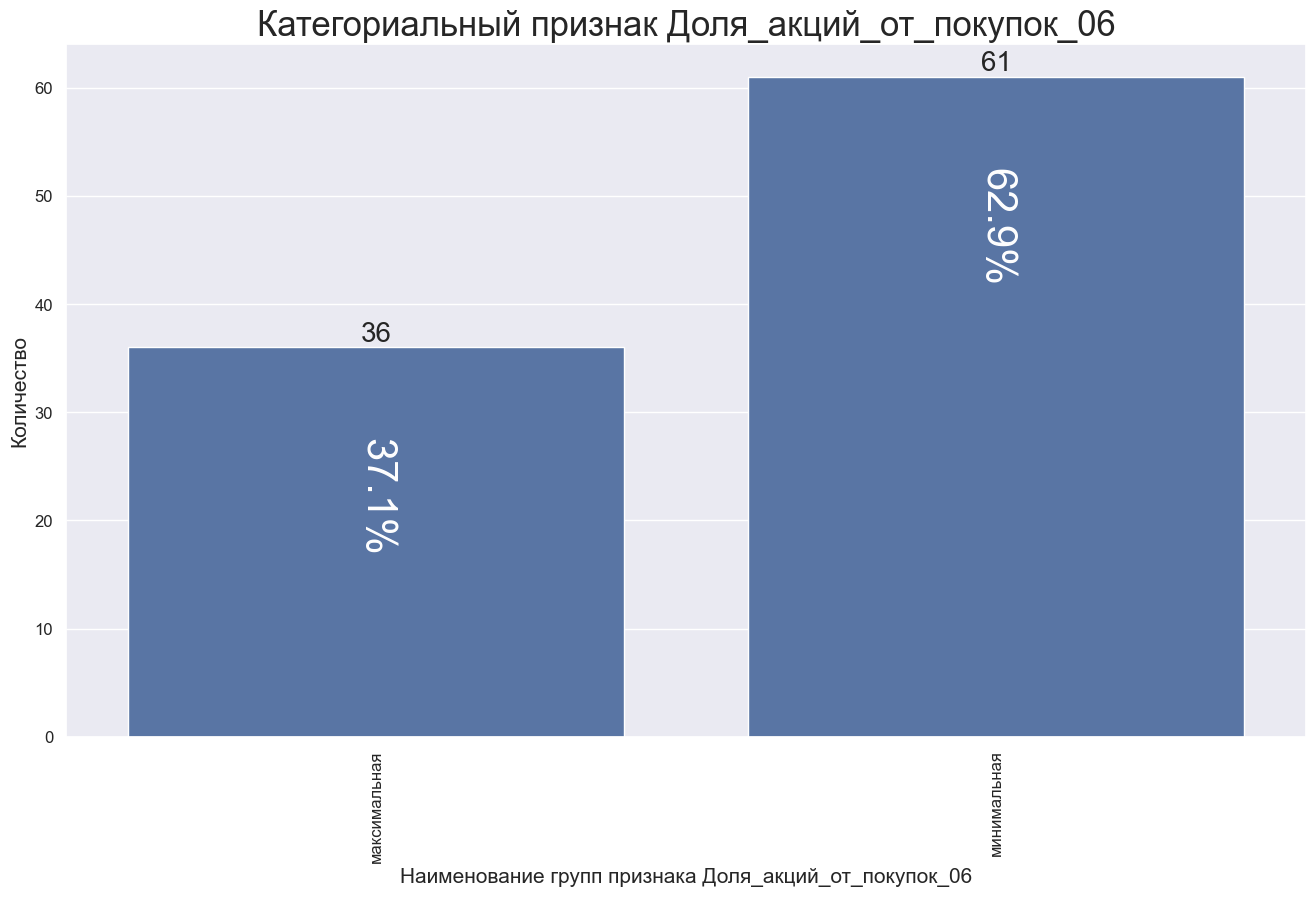

In [84]:
X_test_06_4000['Доля_акций_от_покупок_06'] = X_test_06_4000['Акционные_покупки'].apply(sale)
cat_analysis(X_test_06_4000, cat='Доля_акций_от_покупок_06', r=1)

Если сравнивать долю аукционных покупок, то она значительно отличается от столбчитого графика выше. Видим, что 37% покупателей с всокой вероятностью снижения активности и высокой выручкой купили товар по акции. Скорее всего, данный сегмент покупателей искали товар по выгодной цене.

C:\Users\ksyub\AppData\Local\Temp\ipykernel_12684\794466624.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


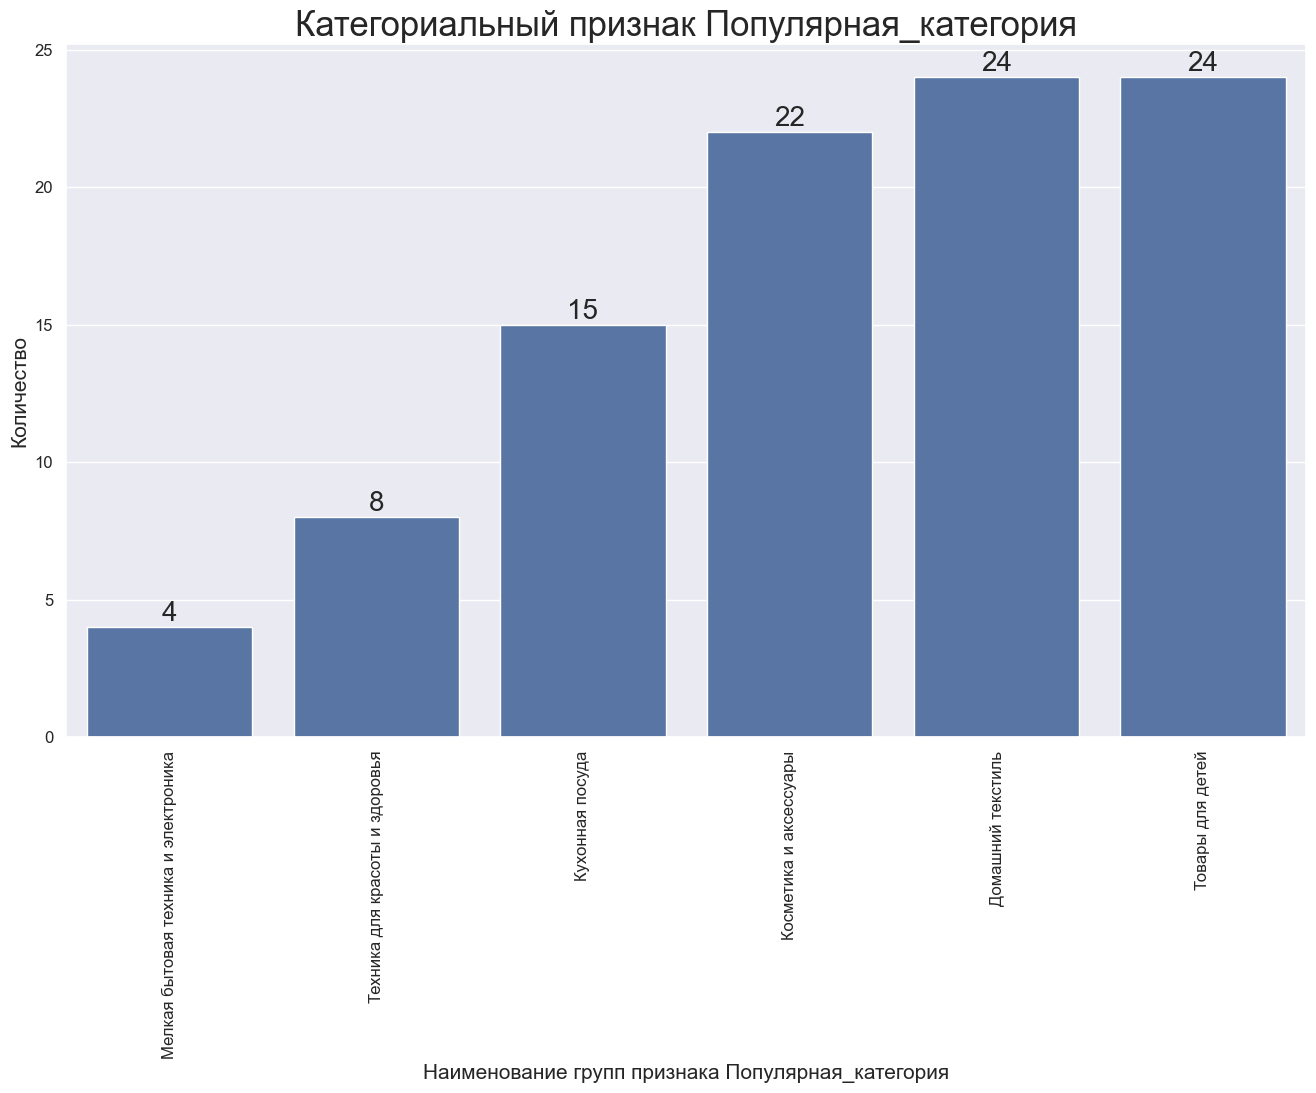

In [85]:
cat_analysis(X_test_06_4000, cat='Популярная_категория', r=0)

Популярные категории товаров у покупателей с низкой активностью и высокой выручкой - товары для детей, домашний текститль и косметика и акссесуары. Столбчатая диаграмма не сильно отличается от диаграммы выше.

### Вывод

На данном шаге были рассмотрены покупатели, чья выручка составляла не менее 5435 и риск, того, что их активность может снизиться.

Из полученных графиков, сделали следующие выводы:

- Клиенты, которые приносят большую выручку и имеют высокую вероятность снижения активности, обычно получают меньше 4 маркетинговых коммуникаций в месяц. Тем, с кем проводится 4-6 коммуникаций, вероятность снижения активности ниже.
- Пользователи с высокой вероятностью снижения активности обычно просматривают до 8 страниц за визит. В то же время большинство из покупателей с низкой вероятностью просматривают 8 и более страниц за визит.
- Клиентов, чей объем выручки превышает 7000, вероятность снижения активности значительно ниже по сравнению с другими покупателями. (в текущем месяце)
- Покупатели из указанной группы, у которых снижения активности низкая, совершили более крупные покупки в препредыдущем месяце по сравнению с остальными.
- Клиенты с высокой вероятностью снижения активности обычно проводят на сайте менее 12 минут, преимущественно 6-14 минут. В то время как покупатели с низкой вероятностью снижения активности остаются на сайте в диапазоне 8-20 минут (что в предущем, что и в текущем месяце)

Что можно предложить бизнесу:

1. Нужно сформировать маркетинговое предложение для покупателей на основе их покупок (например, информировать о поступление новых товаров для клиента или снижение цен товары).
2. Для увеличения посещения страниц за 1 сессию лучше подумать насчет верстки сайта, его переленковки.



Если сравнивать сегмгмент покупателей с высокой вероятностью снижения активности и с высокой выручкой с покупательским портретом (см. Исследовательский анализ), то были сделаны следующие выводы:
    
- В среднем, для покупателей с высокой вероятностью низкой активности проводили также 4 активности за 6 месяцев, если сравнивать с исследовательским этапом.
- В среднем, для сегмента покупателей с низкой активностью и высокой доходностью проводиться 4 акции в текущем месяце. Точно также, как и в общих данных.
- Если сравнивать долю аукционных покупок, то она значительно отличается от столбчитого графика выше. Видим, что 37% покупателей с всокой вероятностью снижения активности и высокой выручкой купили товар по акции. Скорее всего, данный сегмент покупателей искали товар по выгодной цене.
- Популярные категории товаров у покупателей с низкой активностью и высокой выручкой - товары для детей, домашний текститль и косметика и акссесуары. Столбчатая диаграмма не сильно отличается от диаграммы выше.
    
Исходя из этого, можно предложить пересмотр ценовой политики и акций: Учитывая, что значительная часть покупателей с высокой вероятностью низкой активности приобретают товары по акции, возможно, стоит пересмотреть стратегию акций и предложить более привлекательные скидки и специальные предложения для этого сегмента.

## Общий вывод

Задача данного проекта звучит следующим образом:
**Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.**

В качестве входных данных нам передали датасеты: `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv`.

Исходя из задачи, на каждом этапе были сделаны следующие выводы:

1. Загрузка данных

- датасеты имеют разную длину `market_file` -1300, `market_money` - 3900, `market_time` - 2600 и `money` - 2600;
- описательная статистика во всех датасетах выглядит правдоподобной;
- в датасете `market_file` столбцы `Покупательская активность`, `Тип сервиса`, `Разрешить сообщать	` выбиваются из общей стилистики, ниже приведем их к общему виду;
- в датасете `market_file` предварительно видим значения в `Тип сервиса` некорректно записаны (пр. `стандартт`), ниже также рассмотрим уникальные значения в каждом столбце;
- в датасете `market_time` столбец `минут`,  выбивается из общей стилистики, ниже приведем его к общему виду;
- в датасете `money` тип значений для столбца `Прибыль` нужно поменять с `object` на `float64`.
    
2. Предобработка данных.

- явные дубликаты отсутствуют в датасетах;
- изменили тип значения столбца `Прибыль` в датасете `money` с `odject` на `float`, умножили значения на 1000;
- проверили уникальные значения во всех датасетах, нашли опечатки и устранили их.
- переимновали столбцы в датасете `market_file`, чтобы они выглядили идентично другим названиям столбцов. 
    
3. Исследовательский анализ данных
    
В ходе исследования было выявленно:

`market_file`

- `Покупательская_активность` 61.7% (802 записи) имеют прежний уровень, снижение установлено в 38.3% (498 записи) процентах случаях. Виден дисбаланс у групп.
- `Тип_сервиса` в основном преобладает стадарт (71.1% с 924 записями). Премиум всего 28.9% (376 записей). 
- `Разрешить_сообщать` - на рассылку подписаны 74% (962 записи), не подписаны 26% (338 записей).
- `Популярная_категория` - на 1 месте Товары для детей (25.4%, 330 записей), на 2 месте Домашний текстиль (19.3%, 251 запись), на 3 Косметика и аксессуары (17.2%, 223 записи).
- В среднем приходится 4 маркетинговые коммуникации за последние 6 месяцев. Распределение в `Маркет_актив_6_мес` не распределено нормально.
- Больше всего было маркетинговых акций на 4 месяце - 669 (51.5%).
- Признак длительность не распределено нормально (p-value < 0.5). В среднем, люди зарегистрированы 602 дня. Минимально 110, максимально 1079 дней.
- Признак `Акционные_покупки` нужно перевести в категориальную шкалу. В основном преобладают покупки не по акции.
- В среднем посетитили просматриваю 3 категории.
- Большинство покупателей не оплачивают 1-2 покупк в корзине. 0.3% оставляют 9-10 товаров в корзине. 3% -оплачивают покупки, не оставляя в корзине.
- Чаще всего случается 4 сбоя при посещение сайта. Меньше всего, когда нет сбоев.
- В среднем пользователи посещают 8 страниц. Меньше всего 15 и более.

`market_money`

- Периоды равно поделены, в каждом по 1300 значений.
- В среднем выручка составляет 5008 руб с покупателя. Исходя из полученного теста, `Выручка` не распределена нормально. Также заменили медианым значением выручку, которая больше 100000 и убрали 0 выручку. По id-шникам (у которых выручка составляла 0) убрали аналогичные строки в других датасетах.

`market_time`

- Периоды равно поделены по 13000 значений.
- В среднем пользователи проводят на сайте 13 минут. Исходя из полученного теста, `минут` не распределено нормально.

`money`

Средняя прибыль от продаж с по каждому покупателю составляет 3998. Распределение не явлеятся нормальным.
    
4. Объединение таблиц

С помощью `pivot_table()` и `merge()` объеденили 3 датасета в 1 (`market`).
    
5. Корреляционный анализ

- `Выручка_предыдущий_месяц` и `Выручка_текущий_месяц` (0.88) достаточно сильно связаны. Скорее всего, в интернет-магазине есть постоянные клиенты, которые регулярно покупают товары.
- Присутствует корреляция между `Доля_акций_от_покупок_06` и `Акционные_покупки`. Это вполне очевидно, так как из последнего вытекает первое.
- На графиках видим, что большинство признаков не имеют связи, кроме `Выручка_предыдущий_месяц` и `Выручка_текущий_месяц` (похоже на линейную).
- Точки на графиках не образуют четко выделенные кластеры.
- Имеет смысл перевести `Акционные_покупки` в категориальную шкалу. 
    
6. Использование пайплайнов

На данном шаге мы использовали пайплайн, чтобы определить лучшую модель для наших данных:

- Отобрали количественные и категориальные признаки.
- Обучили 4 модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(), как минимум с 1 гиперпараметром.
- Лучшей моделью оказалась логистическая ROC-AUC=0.92.
    
7. Анализ важности признаков

    1. Малозначимыми признаки являются: `Длительность`, `Неоплаченные_продукты_штук_квартал`, `Тип_сервиса`, `Разрешить_сообщать`, `Минут_текущий_месяц`.
    2. Признаки, которые влияют больше на снижение покупательской активности: `Популярная_категория`, `Ошибка_сервиса`, `Выручка_текущий_месяц`, `Средний_просмотр_категорий_за_визит`, `Акционные_покупки`.

Из рекомендаций стоит пересмотреть ассортимент в менее популярных категориях, пофиксить баги на сайте, сделать внутренюю перелинковку страниц, а также подумать над новым маркетинговым продвижением для увеличения выручки.

8. Сегментация покупателей

На данном шаге были рассмотрены покупатели, чья выручка составляла не менее 5435 и риск, того, что их активность может снизиться.

Из полученных графиков, сделали следующие выводы:

- Клиенты, которые приносят большую выручку и имеют высокую вероятность снижения активности, обычно получают меньше 4 маркетинговых коммуникаций в месяц. Тем, с кем проводится 4-6 коммуникаций, вероятность снижения активности ниже.
- Пользователи с высокой вероятностью снижения активности обычно просматривают до 8 страниц за визит. В то же время большинство из покупателей с низкой вероятностью просматривают 8 и более страниц за визит.
- Клиентов, чей объем выручки превышает 7000, вероятность снижения активности значительно ниже по сравнению с другими покупателями. (в текущем месяце)
- Покупатели из указанной группы, у которых снижения активности низкая, совершили более крупные покупки в препредыдущем месяце по сравнению с остальными.
- Клиенты с высокой вероятностью снижения активности обычно проводят на сайте менее 12 минут, преимущественно 6-14 минут. В то время как покупатели с низкой вероятностью снижения активности остаются на сайте в диапазоне 8-20 минут (что в предущем, что и в текущем месяце)

Что можно предложить бизнесу:

1. Нужно сформировать маркетинговое предложение для покупателей на основе их покупок (например, информировать о поступление новых товаров для клиента или снижение цен товары).
2. Для увеличения посещения страниц за 1 сессию лучше подумать насчет верстки сайта, его переленковки.

Если сравнивать сегмгмент покупателей с высокой вероятностью снижения активности и с высокой выручкой с покупательским портретом (см. Исследовательский анализ), то были сделаны следующие выводы:
    
- В среднем, для покупателей с высокой вероятностью низкой активности проводили также 4 активности за 6 месяцев, если сравнивать с исследовательским этапом.
- В среднем, для сегмента покупателей с низкой активностью и высокой доходностью проводиться 4 акции в текущем месяце. Точно также, как и в общих данных.
- Если сравнивать долю аукционных покупок, то она значительно отличается от столбчитого графика выше. Видим, что 37% покупателей с всокой вероятностью снижения активности и высокой выручкой купили товар по акции. Скорее всего, данный сегмент покупателей искали товар по выгодной цене.
- Популярные категории товаров у покупателей с низкой активностью и высокой выручкой - товары для детей, домашний текститль и косметика и акссесуары. Столбчатая диаграмма не сильно отличается от диаграммы выше.
    
Исходя из этого, можно предложить пересмотр ценовой политики и акций: Учитывая, что значительная часть покупателей с высокой вероятностью низкой активности приобретают товары по акции, возможно, стоит пересмотреть стратегию акций и предложить более привлекательные скидки и специальные предложения для этого сегмента.